<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/main/7506R_1C2024_GRUPO08_CHECKPOINT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://campus.fi.uba.ar/img/fiuba-footer-logo.png" height="180"/>
</p>

<p align="center">
<font size="+3">
[75.06] Organizacion de Datos - Curso Rodriguez
<br>
Trabajo Práctico 1 - Propiedades en Venta
<br>
2024 1°C
<br>
Grupo 8
</font>
</p>
<br>

---

<br>
<font size="+2">
Integrantes
</font>
<br>
<font size="+1">
<ul align="center">
<li>Pratto, Federico Nicolas - 96.223</li>
<li>Ramirez, Jose Israel - 93.751</li>
<li>Testa, Santiago Tomas - 108.301</li>
<li>Torres, Santiago/Danny - 108.061</li>
</ul>
</font>

</p>

<br>
<br>

## 1. Imports y carga de archivos

Importamos las librerias que vamos a utilizar.

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.font_manager
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import seaborn as sns

import numpy as np
import scipy.stats as st

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None

In [ ]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/fede/datasets/"

Importamos el dataset de Properati

In [ ]:
ds_properati = pd.read_csv(ruta + "properati_argentina_2021.csv")



---



## 2. Análisis Exploratorio y Preprocesamiento de Datos

El objetivo será explorar y preparar los datos para poder trabajar con los distintos modelos de aprendizaje automático.

Se deben filtrar únicamente los anuncios de propiedades de tipo vivienda (Casa, PH y Departamento) ubicados en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

### 2.1. Exploración Inicial

Analizar cada variable, considerando los siguientes aspectos:

* Variables Cuantitativas: Calcular medidas de resumen (media, mediana, moda,
etc)
* Variables Cualitativas: Mostrar cantidad de valores posibles, y frecuencias de cada uno.
* Determinar variables irrelevantes en el análisis.
* Realizar un análisis gráfico de las distribuciones de las variables más relevantes.
* Analizar las correlaciones existentes entre las variables.

#### 2.1.1. Analisis inicial

Comenzaremos haciendo un analisis inicial del contenido del dataset, asi como agrupando las variables segun su tipo.


In [ ]:
ds_properati_shape = ds_properati.shape
print(f"Nuestro dataset esta compuesto por {ds_properati_shape[0]} publicaciones (filas) y {ds_properati_shape[1]} variables (columnas)")

Nuestro dataset esta compuesto por 460154 publicaciones (filas) y 20 variables (columnas)


In [ ]:
ds_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [ ]:
ds_properati.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

Clasificando las variables presentes en este dataset las dividiremos en :
- Cualitativas (categoricas):
    - Ordinales
    - Nominales
- Cuantitativas (numericas):
    - Discretas
    - Continuas


---



Las variables **cuantitativas** observadas en el dataset son:

- `latitud` (continua): Latitud en la que se encuentra la propiedad.
- `longitud` (continua): Longitud en la que se encuentra la propiedad.
- `property_rooms` (discreta): Cantidad de ambientes con los que cuenta de la propiedad.
- `property_bedrooms` (discreta): Cantidad de dormitorios con los que cuenta la propiedad.
- `property_surface_total` (continua): Superficie total que ocupa la propiedad.
- `property_surface_covered` (continua): Superficie de terreno cubierta con que cuenta la propiedad.
- `property_price` (continua): Precio de la propiedad

</br>

Ademas, contamos con las siguientes variables, que si bien estas anotadas como `Strings`, al ser fechas, son variables cuantitativas y las mismas seran casteadas a tipo `date`.

- `start_date` (discreta): Fecha de alta del aviso.
- `end_date` (discreta): Fecho de baja del aviso.
- `created_on` (discreta): Fecha de alta de la primera versión del aviso.

In [ ]:
# Casteo las variables start_date, end_date y created_on como tipo date.
variables_a_castear = [
    "start_date",
    "end_date",
    "created_on"
    ]

for variable in variables_a_castear:
  ds_properati[variable] = pd.to_datetime(ds_properati[variable], errors="coerce")

A continuacion se muestran las medidas de resumen de las variables mencionadas:

In [ ]:
variables_cuantitativas = ds_properati.select_dtypes(exclude = "object").columns.to_list()
variables_cuantitativas.remove("place_l6") # Quito esta fila, pues es cualitativa
ds_properati[variables_cuantitativas].describe()

start_date                       end_date  \
count                         460154                         432807   
mean   2021-06-30 21:27:58.650190848  2021-09-09 12:02:39.002973440   
min              2021-01-01 00:00:00            2021-01-01 00:00:00   
25%              2021-04-05 00:00:00            2021-06-05 00:00:00   
50%              2021-06-30 00:00:00            2021-08-28 00:00:00   
75%              2021-09-25 00:00:00            2022-01-27 00:00:00   
max              2021-12-31 00:00:00            2022-09-19 00:00:00   
std                              NaN                            NaN   

                          created_on        latitud       longitud  \
count                         460154  419740.000000  419740.000000   
mean   2021-06-30 21:27:58.650190848     -34.228570     -59.557066   
min              2021-01-01 00:00:00     -54.832057    -103.219258   
25%              2021-04-05 00:00:00     -34.640132     -58.899343   
50%              2021-06-30 00:00:00     -34.585122     -58.488309   
75%              2021-09-25 00:00:00     -34.423414     -58.404876   
max              2021-12-31 00:00:00      42.557773     -35.044991   
std                              NaN       3.251509       2.905129   

       property_rooms  property_bedrooms  property_surface_total  \
count   368498.000000      344113.000000           397813.000000   
mean         3.278053           2.297960              420.601250   
min          1.000000          -3.000000               -1.000000   
25%          2.000000           1.000000               50.000000   
50%          3.000000           2.000000               90.000000   
75%          4.000000           3.000000              210.000000   
max         40.000000         390.000000           200000.000000   
std          1.870832           1.673985             4026.380748   

       property_surface_covered  property_price  
count              4.279160e+05    4.421530e+05  
mean               9.605005e+03    3.063273e+05  
min               -3.000000e+00    0.000000e+00  
25%                4.500000e+01    4.490000e+04  
50%                7.800000e+01    9.800000e+04  
75%                1.700000e+02    1.990000e+05  
max                2.147484e+09    1.500000e+09  
std                3.440367e+06    4.899613e+06

In [ ]:
# Muestreo el porcentaje de entradas nulas en cada variable cuantitativa.
cantidad_de_filas = ds_properati.shape[0]
for variable in variables_cuantitativas:
  cantidad_de_nulos = ds_properati[variable].isnull().sum()
  porcentaje_de_nulos = round(100 * cantidad_de_nulos / cantidad_de_filas, 2)
  print(f"La variable \"{variable}\" tiene un {porcentaje_de_nulos}% de valores NULOS!")

La variable "start_date" tiene un 0.0% de valores NULOS!
La variable "end_date" tiene un 5.94% de valores NULOS!
La variable "created_on" tiene un 0.0% de valores NULOS!
La variable "latitud" tiene un 8.78% de valores NULOS!
La variable "longitud" tiene un 8.78% de valores NULOS!
La variable "property_rooms" tiene un 19.92% de valores NULOS!
La variable "property_bedrooms" tiene un 25.22% de valores NULOS!
La variable "property_surface_total" tiene un 13.55% de valores NULOS!
La variable "property_surface_covered" tiene un 7.01% de valores NULOS!
La variable "property_price" tiene un 3.91% de valores NULOS!


En cuanto a variables **cualitativas**, se tienen:

- `id` (nominal): ID de la propiedad.
- `operation` (nominal): Tipo de operación (venta, alquiler, etc.)
- `place_l2` (nominal): Nivel de division administrativa 2, correspondiente a la provincia donde se encuentra la propiedad.
- `place_l3` (nominal): Nivel de division administrativa 3, correspondiente a la ciudad donde se encuentra la propiedad.
- `place_l4` (nominal): Nivel de division administrativa 4, correspondiente al barrio donde se encuentra la propiedad.
- `place_l5` (nominal): Nivel de division administrativa 5. No tiene una equivalencia definida por documentación.
- `place_l6` (nominal): Nivel de division administrativa 6. No tiene una equivalencia definida por documentación.
- `property_type` (nominal): Tipo de propiedad (Casa, Departamento, PH)
- `property_currency` (nominal): Moneda correspondiente al precio publicado.
- `property_title` (nominal): Titulo del anuncio.


In [ ]:
# Listamos todas las variables cualitativas.
variables_cualitativas = ds_properati.select_dtypes("object").columns.to_list()
variables_cualitativas.remove("id") # Remuevo la variable ID pues carece de sentido analizarla.
variables_cualitativas.append("place_l6") # Agrego la variable place_l6 pues esta mal clasificada.
variables_cualitativas.sort()

# Muestreo mis variables.
for variable in variables_cualitativas:
  print(f"La variable \"{variable}\" cuanta con los siguientes valores:\n")
  print(ds_properati[variable].value_counts())

  # Si una variable tiene valores nulos, muestro el porcentaje de los mismos.
  cantidad_de_nulos = ds_properati[variable].isnull().sum()
  cantidad_de_filas = ds_properati.shape[0]
  if(cantidad_de_nulos != 0):
    porcentaje_de_nulos = round(100 * cantidad_de_nulos / cantidad_de_filas, 2)
    print(f"\n¡CUIDADO, esta variable tiene {porcentaje_de_nulos}% de valores NULOS!")

  # Separador
  print("\n*******************************************\n")

La variable "operation" cuanta con los siguientes valores:

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

*******************************************

La variable "place_l2" cuanta con los siguientes valores:

place_l2
Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La P

####2.1.2. Filtrado inicial

En esta seccion nos vamos a encargar de hacer un filtrado inicial de los datos para depurar lo mas posible el dataset.

Antes de continuar, vamos a filtrar nuestro dataset para quedarnos solo con el tipo de anuncio que nos fue indicado en el enunciado.

* Tipo de propiedad (`property_type`): Casa, Departamento o PH
* Tipo de moneda (`property_currency`): USD
* Tipo de operación (`operation`): Venta
* Provincia (`place_l2`): Capital Federal

</br>

**NOTA:** Como vimos al final de la sección anterior, hay un 4,03% de propiedades en las cuales figura un valor nulo en la variable `property_currency`, dado que representa una porción relativamente pequeña de nuestro dataset, no seran tenidas en cuenta al momento del filtrado de datos.

In [ ]:
# Muestro el tamaño actual del dataset.
ds_properati_shape = ds_properati.shape
print(f"Tamaño del dataset previo al filtrado: {ds_properati_shape[0]} publicaciones (filas) y {ds_properati_shape[1]} variables (columnas)")

# Filtro las propiedades que cumplen cada criterio.
property_type_cond = ds_properati["property_type"].isin(["Casa", "PH","Departamento"])
property_currency_cond = ds_properati["property_currency"]  == "USD"
operation_cond = ds_properati["operation"] == "Venta"
location_cond = ds_properati["place_l2"] == "Capital Federal"

# Filtro mi dataset con los criterios arriba seleccionados.
ds_properati = ds_properati[property_type_cond & property_currency_cond & operation_cond & location_cond]
ds_properati.reset_index(drop = True, inplace = True)
ds_properati.shape

# Muestro como quedo el dataset.
ds_properati_shape = ds_properati.shape
print(f"Tamaño del dataset luego del filtrado: {ds_properati_shape[0]} publicaciones (filas) y {ds_properati_shape[1]} variables (columnas)")

Tamaño del dataset previo al filtrado: 460154 publicaciones (filas) y 20 variables (columnas)
Tamaño del dataset luego del filtrado: 94249 publicaciones (filas) y 20 variables (columnas)


Analizamos si quedaron filas duplicadas

In [ ]:
cantidad_de_duplicados = ds_properati.duplicated().sum()
print(f"Cantidad de publicaciones duplicadas: {cantidad_de_duplicados}")

Cantidad de publicaciones duplicadas: 0




---


Volvemos a muestrear la composición de las variables de nuestro dataset.

In [ ]:
display(ds_properati.head())
print("\n\nDatos nulos en el dataset:")
ds_properati.isnull().sum()

id start_date   end_date created_on    latitud  \
0  CyZu6IaZgmQYGk8jmPajCg== 2021-09-09 2021-09-26 2021-09-09        NaN   
1  d3Z0MblSb2IMBoOBMGJEEQ== 2021-09-09 2021-09-26 2021-09-09 -34.637319   
2  rL7qPkQnomsMGu2ViS3sBw== 2021-09-09 2021-09-28 2021-09-09 -34.628647   
3  vuX/ccLAMVml4qWRFcOJUA== 2021-09-09 2022-01-05 2021-09-09 -34.610027   
4  ZTtSCeqZ3HUgf5jjwEzRcw== 2021-09-09 2022-03-09 2021-09-09 -34.631621   

    longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
1 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
2 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
3 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
4 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             4.0                3.0                   171.0   
1  Departamento             3.0                2.0                    58.0   
2  Departamento             4.0                3.0                    70.0   
3  Departamento             4.0                2.0                     NaN   
4            PH             4.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     133.0        210000.0               USD   
1                      55.0         82900.0               USD   
2                      70.0         99000.0               USD   
3                     104.0        146000.0               USD   
4                      73.0        250000.0               USD   

                                property_title  
0  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
1       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
2   Departamento - 4 Ambientes - Catalinas Sur  
3          Venta departamento 4 ambientes Once  
4                                   PH - Boedo



Datos nulos en el dataset:


id                              0
start_date                      0
end_date                     5041
created_on                      0
latitud                      3730
longitud                     3730
place_l2                        0
place_l3                      417
place_l4                    90606
place_l5                    94249
place_l6                    94249
operation                       0
property_type                   0
property_rooms               1044
property_bedrooms           10987
property_surface_total       4844
property_surface_covered     3354
property_price                  0
property_currency               0
property_title                  0
dtype: int64

Como vemos, si bien hemos limpiado nuestro dataset para dejar unicamente el tipo de publicaciones que nos interesa analizar, aun hay bastante que depurar, pero ya nos encargaremos de esto un poco mas adelante cuando hagamos un filtrado mas fino.

In [ ]:
# Muestreamos las variables cuantitativas
variables_cuantitativas = ds_properati.select_dtypes(exclude = "object").columns.to_list()
variables_cuantitativas.remove("place_l6")
ds_properati[variables_cuantitativas].describe()

start_date                       end_date  \
count                          94249                          89208   
mean   2021-07-01 08:38:57.331961344  2021-09-14 10:40:09.685230080   
min              2021-01-01 00:00:00            2021-01-02 00:00:00   
25%              2021-04-03 00:00:00            2021-06-05 00:00:00   
50%              2021-06-29 00:00:00            2021-08-30 00:00:00   
75%              2021-09-24 00:00:00            2022-01-27 00:00:00   
max              2021-12-31 00:00:00            2022-09-19 00:00:00   
std                              NaN                            NaN   

                          created_on       latitud      longitud  \
count                          94249  90519.000000  90519.000000   
mean   2021-07-01 08:38:57.331961344    -34.591481    -58.449795   
min              2021-01-01 00:00:00    -53.788624    -71.471192   
25%              2021-04-03 00:00:00    -34.615975    -58.466522   
50%              2021-06-29 00:00:00    -34.595790    -58.439000   
75%              2021-09-24 00:00:00    -34.577413    -58.408862   
max              2021-12-31 00:00:00    -24.219827    -54.133330   
std                              NaN      0.181719      0.292630   

       property_rooms  property_bedrooms  property_surface_total  \
count    93205.000000       83262.000000            89405.000000   
mean         2.822799           2.014629              109.092970   
min          1.000000          -1.000000               10.000000   
25%          2.000000           1.000000               45.000000   
50%          3.000000           2.000000               65.000000   
75%          4.000000           3.000000              105.000000   
max         40.000000          70.000000           137000.000000   
std          1.426148           1.129767              980.401976   

       property_surface_covered  property_price  
count              90895.000000    9.424900e+04  
mean                  87.931932    2.262382e+05  
min                    1.000000    5.000000e+03  
25%                   40.000000    9.500000e+04  
50%                   58.000000    1.439000e+05  
75%                   88.000000    2.370000e+05  
max               217000.000000    2.140000e+07  
std                  990.927129    3.186035e+05

Si analizamos las variables `start_date` y `created_on` vemos que nos dan valores extrañamente similares, vamos a chequear que no tengan los mismos datos repetidos.

In [ ]:
# Comparamos la columna start_date con la columna created_on
ds_properati["start_date"].equals(ds_properati["created_on"])

True

Tienen exactamente los mimso valores. Con lo cual la anotamos para eliminarla cuando hagamos el filtrado fino.



---



In [ ]:
# Listamos todas las variables cualitativas.
variables_cualitativas = ds_properati.select_dtypes("object").columns.to_list()
variables_cualitativas.remove("id") # Remuevo la variable ID pues carece de sentido analizarla.
variables_cualitativas.append("place_l6") # Agrego la variable place_l6 pues esta mal clasificada.
variables_cualitativas.sort()

# Muestreo mis variables.
for variable in variables_cualitativas:
  print(f"La variable \"{variable}\" cuanta con los siguientes valores:\n")
  print(ds_properati[variable].value_counts())

  # Si una variable tiene valores nulos, muestro el porcentaje de los mismos.
  cantidad_de_nulos = ds_properati[variable].isnull().sum()
  cantidad_de_filas = ds_properati.shape[0]
  if(cantidad_de_nulos != 0):
    porcentaje_de_nulos = round(100 * cantidad_de_nulos / cantidad_de_filas, 2)
    print(f"\n¡CUIDADO, esta variable tiene {porcentaje_de_nulos}% de valores NULOS!")

  # Separador
  print("\n*******************************************\n")

La variable "operation" cuanta con los siguientes valores:

operation
Venta    94249
Name: count, dtype: int64

*******************************************

La variable "place_l2" cuanta con los siguientes valores:

place_l2
Capital Federal    94249
Name: count, dtype: int64

*******************************************

La variable "place_l3" cuanta con los siguientes valores:

place_l3
Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas  

#### 2.1.3. Eliminación de variables irrelevantes



Procedemos a eliminar las siguientes variables, dado que las mismas carecen de sentido para el estudio que estamos realizando.

* `id` - No tiene ningun sentido conservar esta columna con los codigos con los que el cliente identificaba a las publicaciones.
* `property_currency` - Dado que hemos filtrado el dataset, dejando solo las publicaciones en dolares, carece de sentido conservar esta columna.
* `operation` - Dado que solo dejamos las operaciones de Venta de propiedades, carece de sentido conservar esta variable.
* `place_l2` - Esta variable contiene la Provincia donde esta ubicada la publicacion, y como solo hemos dejado las publicaciones ubicadas en CABA, carece de sentido conservarla.
* `place_l4` - Esta variable tiene un 96,13% de valores nulos, carece de sentido conservarla.
* `place_l5` - Esta variable tiene un 100% de valores nulos, carece de sentido conservarla.
* `place_l6` - Esta variable tiene un 100% de valores nulos, carece de sentido conservarla.
* `property_title` - No vemos ninguna utilidad práctica en consevar el titulo con el que fue publicada la vivienda.
- `created_on` - Esta variable contiene la fecha de alta de la primera versión del aviso, pero al revisarla en la sección anterior, se vio que tiene exactamente los mismos valores que la variable `start_date`, con lo cual se la elimina.

**Variables que se conservaron**

- `latitud` (continua): Latitud en la que se encuentra la propiedad.
- `longitud` (continua): Longitud en la que se encuentra la propiedad.
- `property_rooms` (discreta): Cantidad de ambientes con los que cuenta de la propiedad.
- `property_bedrooms` (discreta): Cantidad de dormitorios con los que cuenta la propiedad.
- `property_surface_total` (continua): Superficie total que ocupa la propiedad.
- `property_surface_covered` (continua): Superficie de terreno cubierta con que cuenta la propiedad.
- `property_price` (continua): Precio de la propiedad
- `start_date` (discreta): Fecha de alta del aviso.
- `end_date` (discreta): Fecha de baja del aviso.
- `place_l3` (nominal): Nivel de division administrativa 3, correspondiente a la ciudad donde se encuentra la propiedad.
- `property_type` (nominal): Tipo de propiedad (Casa, Departamento, PH)

Graficamos el porcentaje de entradas nulas en cada variable para reforzar lo expresado arriba.

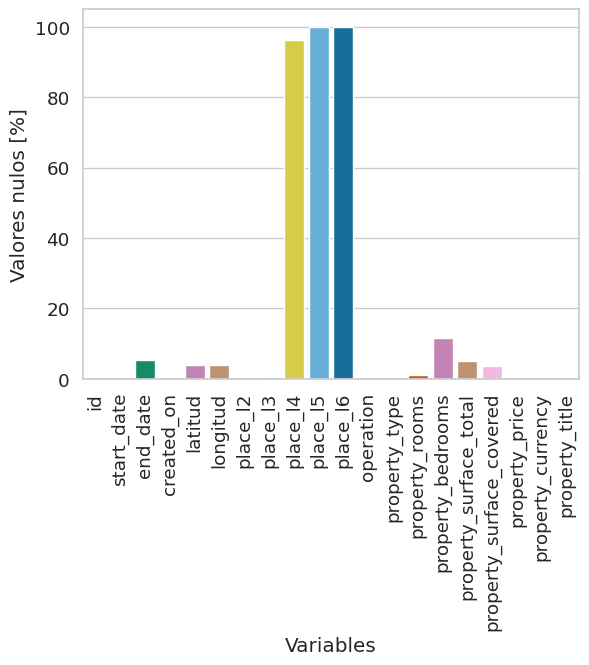

In [ ]:
# Calculamos los nulos.
cantidad_de_filas = ds_properati.shape[0]
cantidad_de_nulos = ds_properati.isnull().sum()
porcentaje_de_nulos = (cantidad_de_nulos / cantidad_de_filas) * 100

# Armamos el grafico de porcentajes.
sns.barplot(x = porcentaje_de_nulos.index,
            y = porcentaje_de_nulos.values,
            palette = "colorblind")

plt.xlabel("Variables") # Leyenda eje x
plt.ylabel("Valores nulos [%]") # Leyenda eje y
plt.xticks(rotation = 90) # Rotacion de los indices en el eje X

# Muestro la grafica.
plt.show()

Borramos las variables innecesarias.

In [ ]:
variables_a_borrar = [
    "id",
    "property_currency",
    "operation",
    "place_l2",
    "place_l4",
    "place_l5",
    "place_l6",
    "property_title",
    "created_on"
    ]

ds_properati.drop(variables_a_borrar, axis=1, inplace = True)

In [ ]:
ds_properati.head()

start_date   end_date    latitud   longitud place_l3 property_type  \
0 2021-09-09 2021-09-26        NaN        NaN      NaN          Casa   
1 2021-09-09 2021-09-26 -34.637319 -58.361124     Boca  Departamento   
2 2021-09-09 2021-09-28 -34.628647 -58.361871     Boca  Departamento   
3 2021-09-09 2022-01-05 -34.610027 -58.401934     Once  Departamento   
4 2021-09-09 2022-03-09 -34.631621 -58.416825    Boedo            PH   

   property_rooms  property_bedrooms  property_surface_total  \
0             4.0                3.0                   171.0   
1             3.0                2.0                    58.0   
2             4.0                3.0                    70.0   
3             4.0                2.0                     NaN   
4             4.0                2.0                     NaN   

   property_surface_covered  property_price  
0                     133.0        210000.0  
1                      55.0         82900.0  
2                      70.0         99000.0  
3                     104.0        146000.0  
4                      73.0        250000.0

#### 2.1.4. Analisis grafico

En esta sección vamos a realizar un análisis gráfico de las distribuciones de las variables más relevantes.

Graficamos algunas variables cualitativas para su interpretación mediante graficos

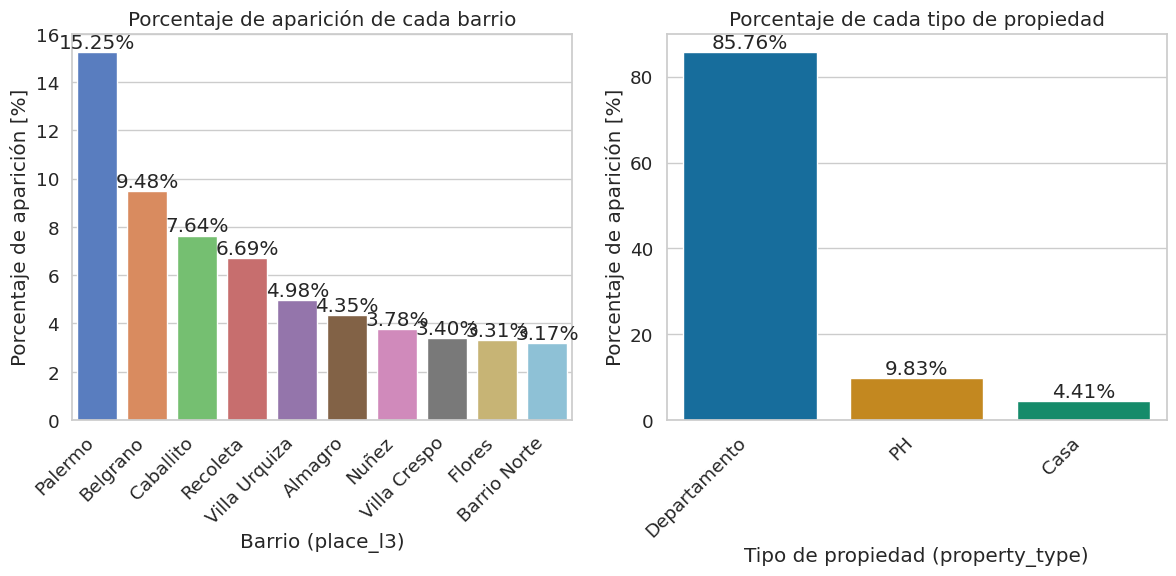

In [ ]:
# Porcentaje de aparición de cada barrio en un TOP 10
barrios_top = (ds_properati["place_l3"].value_counts(normalize=True) * 100).head(10)

# Porcentaje de cada tipo de propiedad publicada.
tipos_de_propiedad = ds_properati["property_type"].value_counts(normalize=True) * 100

# Creo una figura para almacenar mis  dos subgráficos
plt.figure(figsize=(12, 6))


# Subgráfico 1 - Barrios TOP 10
plt.subplot(1, 2, 1) # Ubico la grafica en la fila 1, columna 1

# Grafico mis datos.
sns.barplot(x=barrios_top.index,
            y=barrios_top.values,
            palette="muted")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(barrios_top):
    plt.text(index, value, f"{value:.2f}%", ha="center", va="bottom")

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Barrio (place_l3)") # agrego un label al eje x
plt.ylabel("Porcentaje de aparición [%]") # agrego un label al eje y
plt.title("Porcentaje de aparición de cada barrio")


# Subgráfico 2 - Tipos de propiedad
plt.subplot(1, 2, 2) # Ubico la grafica en la fila 1, columna 2

# Grafico mis datos.
sns.barplot(x = tipos_de_propiedad.index,
            y = tipos_de_propiedad,
            palette="colorblind")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(tipos_de_propiedad):
    plt.text(index, value, f"{value:.2f}%", ha="center", va="bottom")

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Tipo de propiedad (property_type)") # agrego un label al eje x
plt.ylabel("Porcentaje de aparición [%]") # agrego un label al eje y
plt.title("Porcentaje de cada tipo de propiedad")


plt.tight_layout() # Ajusto el diseño de los subgraficos
plt.show() # Imprimo el resultado.

Como vemos, la gran mayoria de nuestras publicaciones son departamentos y cerca del 62% de nuestras publicaciones estan representadas en el TOP 10 de barrios.

Graficamos algunas variables cuantitativas para su interpretación mediante graficos

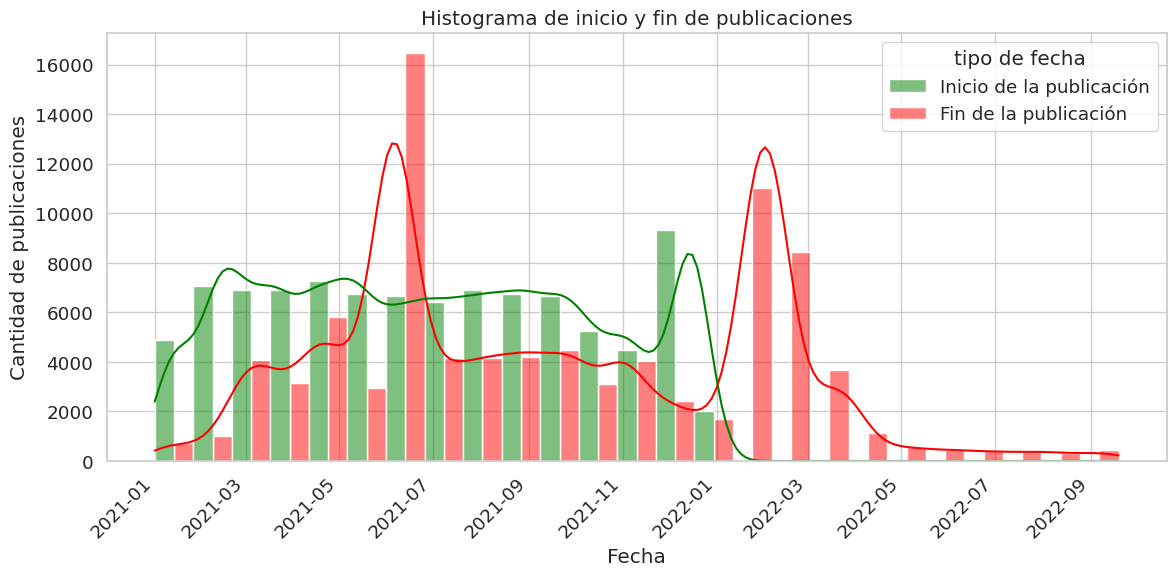

In [ ]:
# Creo una figura para almacenar mi grafica
plt.figure(figsize=(12, 6))

# Armo un dataframe que tenga todas las fechas e indique que tipo de fecha es.
fechas = pd.concat([
    pd.DataFrame({'fecha': ds_properati["start_date"], 'tipo de fecha': 'Inicio de la publicación'}),
    pd.DataFrame({'fecha': ds_properati["end_date"], 'tipo de fecha': 'Fin de la publicación'})
])

# Reinicio los indices, pues sino me quedan los indices duplicados.
fechas.reset_index(drop=True, inplace=True)

# Grafico mis datos
sns.histplot(
    bins = 25,
    data = fechas,
    x = "fecha", # toma la data de la variable fecha
    hue = "tipo de fecha", # separame entre los que empieza y los que terminan
    multiple = "dodge", # separame las barras de inicio y fin (Si pongo stack las apila)
    kde = True, # Agregame la densidad.
    palette = ["green", "red"]
)

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Fecha") # agrego un label al eje x
plt.ylabel("Cantidad de publicaciones") # agrego un label al eje y
plt.title("Histograma de inicio y fin de publicaciones")

plt.tight_layout() # Ajusto el diseño
plt.show() # Imprimo el resultado.

Si bien la publicacion de nuevas propiedades es bastante constante a lo largo del año, vemos un claro pico en el mes de diciembre, seguido de un descenso abrupto en enero.

Asi tambien, vemos unos picos muy pronunciados en Julio y Febrero en cuanto a la finalizacion de las publicaciones.

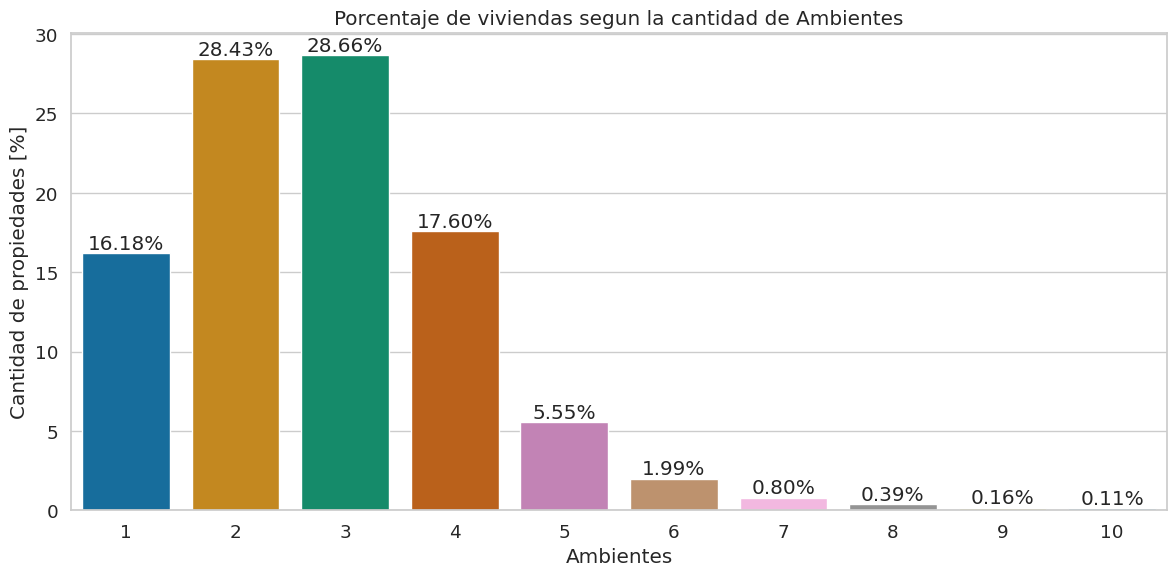

In [ ]:
# Creo una figura para almacenar mi grafica
plt.figure(figsize=(12, 6))

# Calculo el porcentaje que hay de cada tipo de vivienda y me quedo con las 10 mas comunes.
ambientes = (ds_properati["property_rooms"].value_counts(normalize=True) * 100).nlargest(10)
ambientes.index = ambientes.index.astype(int) # Convierto el numero de ambientes a entero.
ambientes = ambientes.sort_index() # ordenos mis indices de menor a mayor.

# Tuve que ordenar los indices, pues sino al momento de pegar los porcentajes al grafico,
# este los pegaba en el orden en el que estan en la serie, el cual diferia del orden
# en que se ploteaban las barran en la grafica (para mayor explicacion, comentar la linea
# donde ordeno los indices)

# Grafico mis datos.
sns.barplot(x = ambientes.index,
            y = ambientes.values,
            palette="colorblind")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(ambientes):
    plt.text(index, value, f'{value:.2f}%', ha="center", va="bottom")

plt.xlabel("Ambientes") # agrego un label al eje x
plt.ylabel("Cantidad de propiedades [%]") # agrego un label al eje y
plt.title('Porcentaje de viviendas segun la cantidad de Ambientes')

plt.tight_layout()
plt.show()

Podemos observar como la mayoria de las propiedades en venta oscilan entre el monoambiente y los 4 ambientes. Siendo los maximos los de 2 y 3 ambientes.

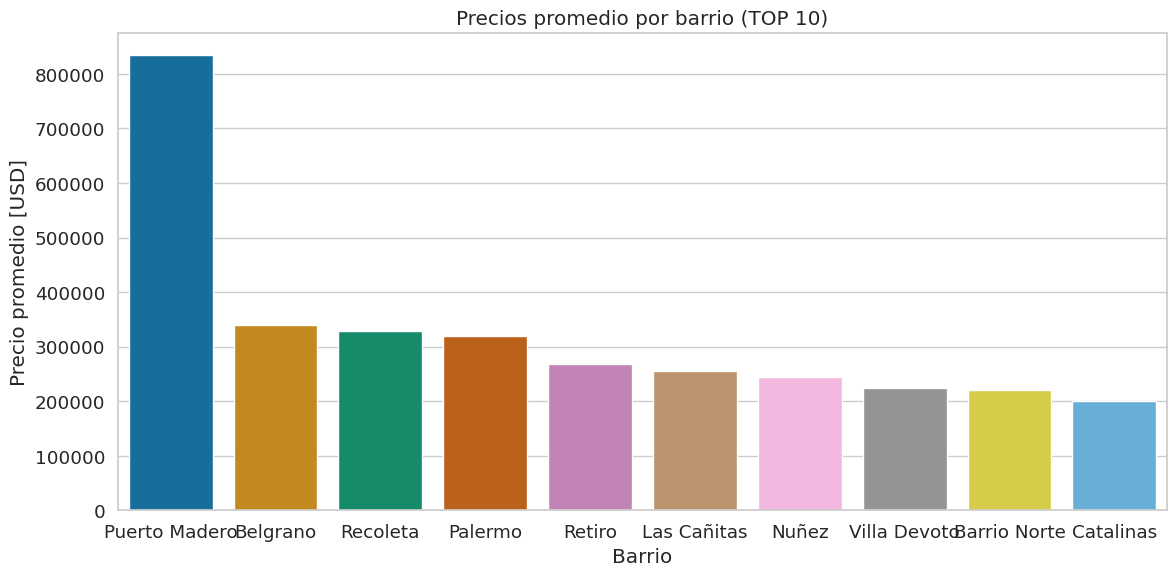

In [ ]:
# Creo un nuevo dataframe solo con las columnas barrio y precio
propiedades = pd.DataFrame({
    'barrio': ds_properati['place_l3'].copy(), # Me copio la columna place_l3 con el nombre barrio
    'precio': ds_properati['property_price'].copy() # Me copio la columna property_price con el nombre precio.
})

# Calcular el promedio de precios por barrio
promedio_precios_por_barrio = propiedades.groupby('barrio')['precio'].mean()

# Me quedo con los 10 barrios con los precios promedio más altos
top_10_barrios_mas_caros = promedio_precios_por_barrio.nlargest(10)

# Grafico mis datos
plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_barrios_mas_caros.index,
            y = top_10_barrios_mas_caros.values,
            palette = "colorblind")

plt.title("Precios promedio por barrio (TOP 10)")
plt.xlabel("Barrio")
plt.ylabel("Precio promedio [USD]")
plt.tight_layout()
plt.show()

# Libero memoria
del propiedades, promedio_precios_por_barrio, top_10_barrios_mas_caros

Como vemos, el promedio de los precios en Puerto Madero se aleja **considerablemente** de los demas barrios. Quizas esto se deba a la presencia de outliers o simplemente sea debido a lo reducido del barrio y el alto poder adquisitivo de sus habitantes.

#### 2.1.5. Analisis de las correlaciones entre las variables

Hacemos un Heatmap con las variables cuantativas para buscar correlaciones.

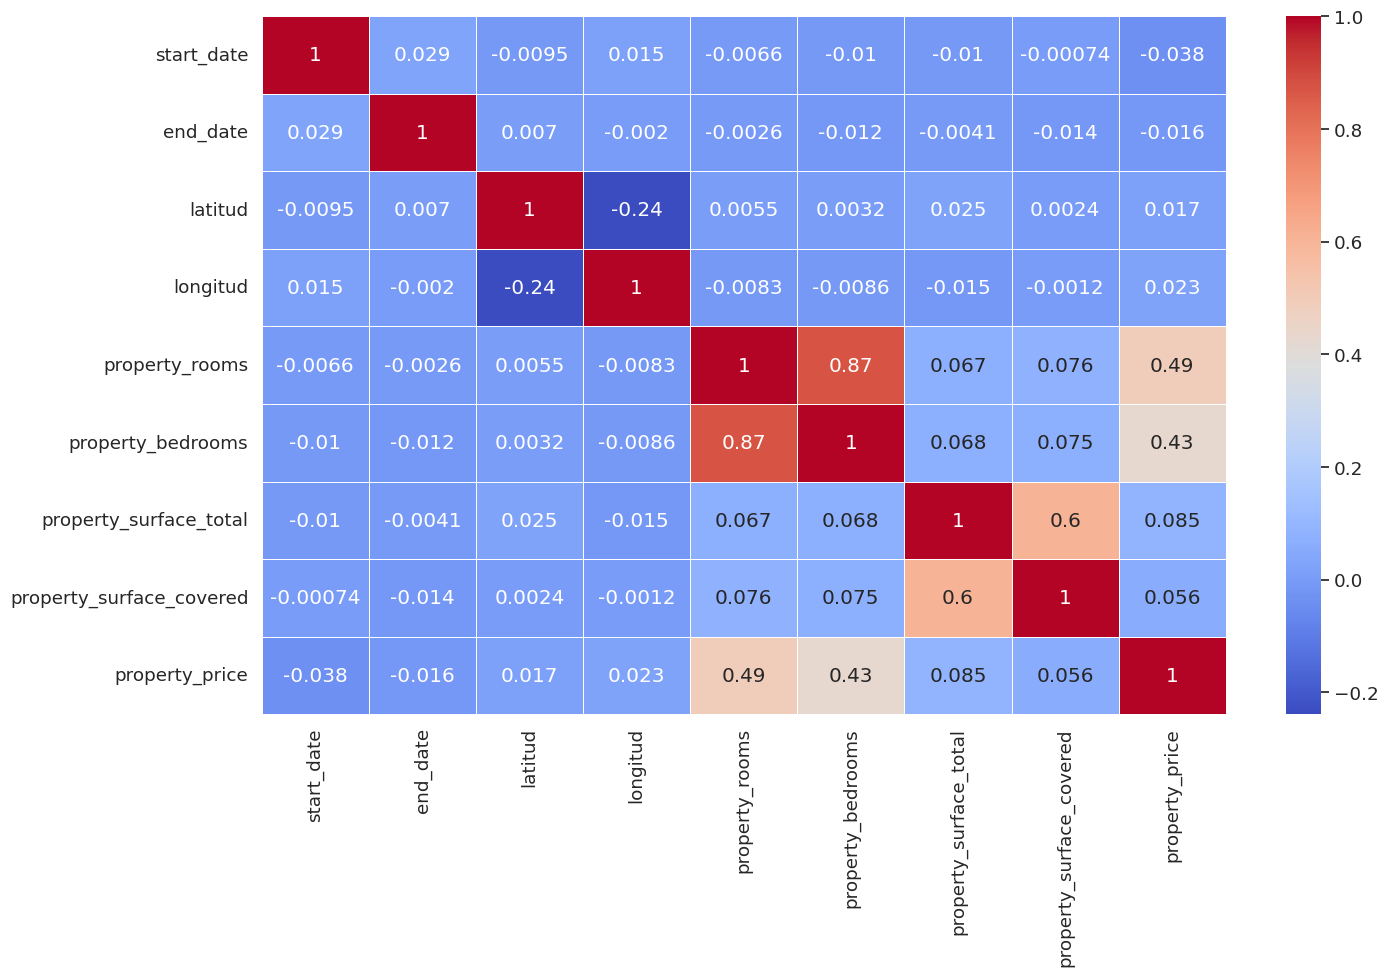

In [ ]:
# Saco las variables nominales para hacer un heatmap
datos = ds_properati.drop(["place_l3","property_type"], axis=1).copy()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data = datos.corr(),
            annot = True,
            cmap = "coolwarm",
            linewidths = 0.5,
            ax = ax)

fig.tight_layout()

**En el grafico podemos observar las siguientes relaciones:**

* `property_rooms` y `property_bedrooms`

  Podemos observar una correlación positiva, lo cual por supuesto es algo esperable, dado que la cantidad de dormitorios de un inmueble siempre estara acotado superiormente por la cantidad de ambientes.

* `property_surface_covered` y `property_surface_total`

  Al igual que en el caso anterior, observamos una correlacion positiva esperable, dado que la superficie total cubierta siempre estara acotada superiormente por la superficie total del inmueble.

* `property_rooms` y `property_price`

  Finalmente, observamos una correlación positiva entre la cantidad de ambientes y el precio de la propiedad. Lo cual, era algo esperable.

Vamos a analizar estas variables mas en profundidad a traves de graficas de dispersión

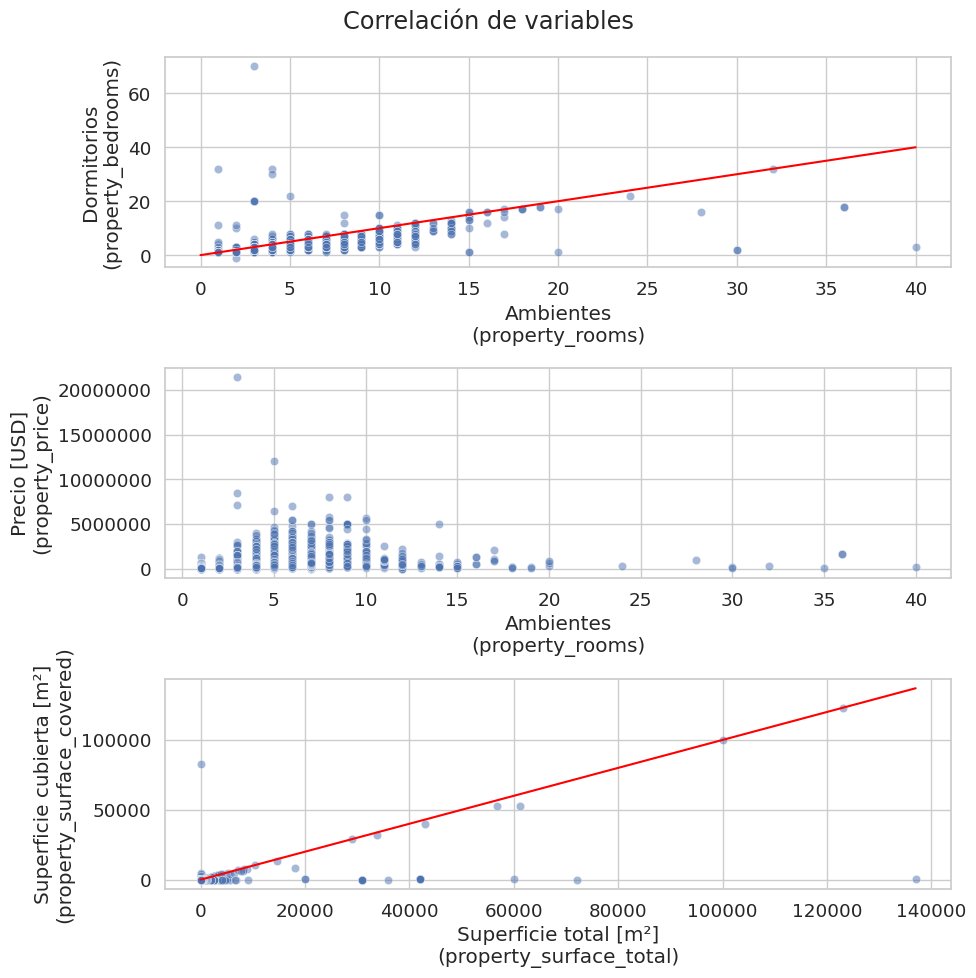

In [ ]:
grafica, ax = plt.subplots(3, 1, figsize=(10, 10))
grafica.suptitle("Correlación de variables")

# Armamos un dataframe con las variables a comparar.
df_para_correlaciones = ds_properati[["property_rooms",
                                      "property_bedrooms",
                                      "property_surface_covered",
                                      "property_surface_total",
                                      "property_price"]]

# 1- Graficamos ambientes vs habitaciones.
sns.scatterplot(x = "property_rooms",
                y = "property_bedrooms",
                data = df_para_correlaciones,
                alpha = 0.5,
                ax = ax[0]
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Dormitorios\n(property_bedrooms)")

# Agrego una recta que marca cuantas habitaciones puede tener como maximo
# una propiedad. Pues ninguna propiedad puede tener mas habitaciones que ambientes.
ambientes_max = df_para_correlaciones["property_rooms"].max()
sns.lineplot(x = [0, ambientes_max],
             y = [0, ambientes_max],
             c = 'Red',
             ax = ax[0]
             )


# 2- Graficamos ambientes vs precio.
sns.scatterplot(x = "property_rooms",
                y = "property_price",
                data = df_para_correlaciones,
                alpha = 0.5,
                ax = ax[1]
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Precio [USD]\n(property_price)")

# Esta linea es para que no muestre el precio en dolares en notación cientifica.
ax[1].ticklabel_format(style="plain", axis="both")


# 3- Graficamos superficie vs superficie cubierta
sns.scatterplot(x = "property_surface_total",
                y = "property_surface_covered",
                data = df_para_correlaciones,
                alpha = 0.5,
                ax = ax[2]
                ).set(xlabel="Superficie total [m²]\n(property_surface_total)",
                      ylabel="Superficie cubierta [m²]\n(property_surface_covered)")

# Agrego una recta que marca la superficie cubierta maxima que puede tener una
# propiedad. Pues ninguna propiedad puede tener mas superficie cubierta que total.
superficie_max = df_para_correlaciones["property_surface_total"].max()
sns.lineplot(x = [0, superficie_max],
             y = [0, superficie_max],
             c = 'Red',
             ax = ax[2]
             )


grafica.tight_layout()


Como podemos observar, hay algunos posibles valores atipicos en ciertas variables.

Por nombrar algunas cosas que se notan a simple vista:

* En la grafica de `property_rooms` vs `property_bedrooms` claramente tenemos publicaciones con mas dormitorios que ambientes, lo cual no es posible. Ademas vemos que hay algunas publicaciones de hasta 40 ambientes.

* En la grafica `property_rooms` vs `property_price` hay publicaciones de 5 ambientes o menos que estan publicadas a un precio por encima de los 10 millones de dolares.

* En la grafica `property_surface_total` vs `property_surface_covered` vemos que hay publicaciones con mas $m^2$ cubiertos que totales. Lo cual es imposible.

Ya nos encargaremos de filtrar esto mas adelante.


### <font color="yellow">2.2. Visualización de los datos</font>

En esta sección se realiza una primera aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de dispersión entre variables, histogramas, heatmaps, exploración de las columnas, etc.

<font color="yellow">Medio que esto ya quedo resuelto en la sección anterior, pero bueh, despues vemos si agregamos algo mas.</font>

### 2.3. Datos Faltantes

En esta sección vamos a analizar la presencia de datos faltantes en el dataset.

1. Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.
2. Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset.
3. Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de valores, eliminación de registros incompletos, etc.
4. En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con la distribución anterior a la imputación de los datos faltantes.

#### 2.3.1 - Analisis de datos faltantes a nivel columna.

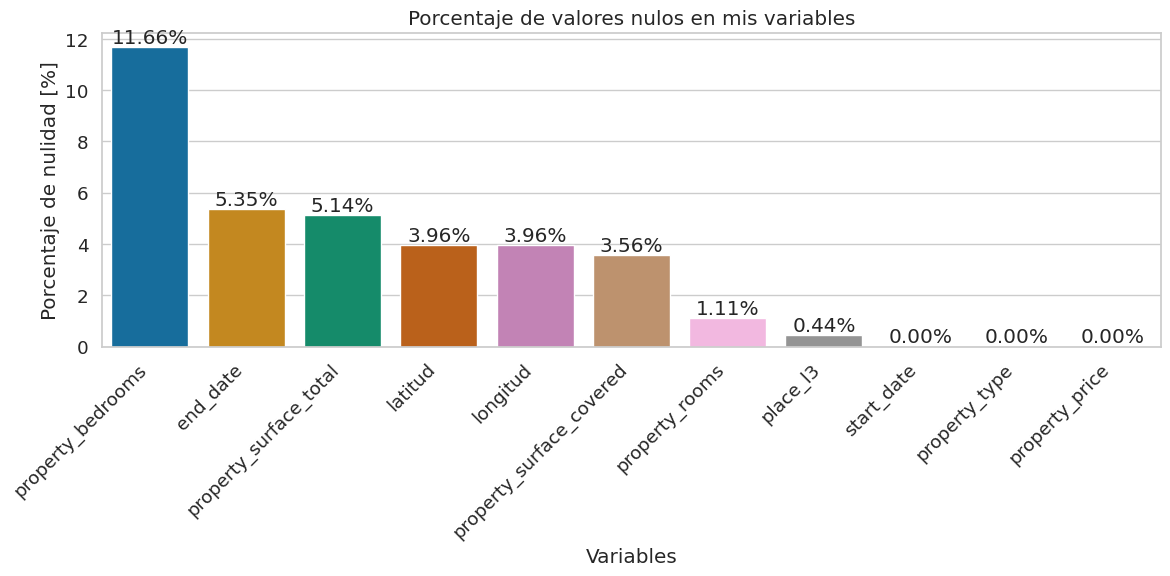

In [ ]:
# Creo una figura para almacenar mi grafica
plt.figure(figsize=(12, 6))

# Calculo el porcentaje de valores nulos que tengo en cada columna.
porcentaje_de_nulos = ds_properati.isnull().mean() * 100

# Ordeno los porcentajes de mayor a menor para resaltar los mas problematicos.
porcentaje_de_nulos = porcentaje_de_nulos.sort_values(ascending=False)


# Grafico mis datos.
sns.barplot(x = porcentaje_de_nulos.index,
            y = porcentaje_de_nulos.values,
            palette="colorblind")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(porcentaje_de_nulos):
    plt.text(index, value, f'{value:.2f}%', ha="center", va="bottom")

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Variables") # agrego un label al eje x
plt.ylabel("Porcentaje de nulidad [%]") # agrego un label al eje y
plt.title("Porcentaje de valores nulos en mis variables")

plt.tight_layout()
plt.show()

Como vemos, mas alla del filtrado inicial que realizamos en la seccion 2.1, aun hay un porcentaje considerable de valores nulos en ciertas variables.

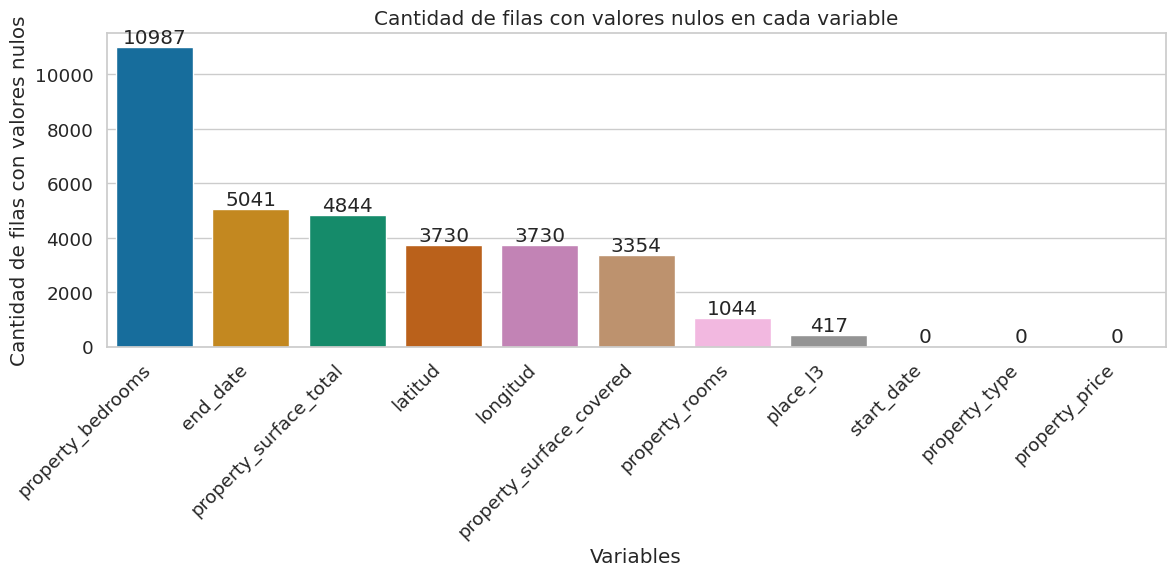

In [ ]:
# Creo una figura para almacenar mi grafica
plt.figure(figsize=(12, 6))

# Calculo el porcentaje de valores nulos que tengo en cada columna.
porcentaje_de_nulos = ds_properati.isnull().sum()

# Ordeno los porcentajes de mayor a menor para resaltar los mas problematicos.
porcentaje_de_nulos = porcentaje_de_nulos.sort_values(ascending=False)


# Grafico mis datos.
sns.barplot(x = porcentaje_de_nulos.index,
            y = porcentaje_de_nulos.values,
            palette="colorblind")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(porcentaje_de_nulos):
    plt.text(index, value, f'{value}', ha="center", va="bottom")

plt.xticks(rotation=45, ha="right") # roto las etiquetas del eje X
plt.xlabel("Variables") # agrego un label al eje x
plt.ylabel("Cantidad de filas con valores nulos") # agrego un label al eje y
plt.title("Cantidad de filas con valores nulos en cada variable")

plt.tight_layout()
plt.show()

Algo interesante a destacar, es que tengo exactamente la misma cantidad de valores nulos en la variable `latitud` y `longitud`. Veamos si se trata de las mismas filas:

In [ ]:
# Esto dara True, solo si ambas filas tienen el valor True (es decir, si ambas variables tienen un valor nulo en la misma fila)
nulos_en_comun = ds_properati["latitud"].isnull() & ds_properati["longitud"].isnull()
nulos_en_comun.sum()

3730

Como vemos, todas las filas que tienen su latitud nula, tambien tienen su longitud nula.

#### 2.3.2 - Análisis de datos faltantes a nivel de fila

In [ ]:
# Me hago un df que indica donde tengo valores nulos.
ds_nulos = ds_properati.isnull()

# any(axis=1) me devuelve una serie booleana, con True si encontro algun valor True en la fila (es decir, si hay un nulo)
# Luego el metodo .sum() suma los valores True, es decir, las filas que tienen al menos un valor nulo.
filas_nulas = ds_nulos.any(axis=1).sum()
print(f"La cantidad de filas con valores nulos es: {filas_nulas}")

# Calculo el porcentaje de filas nulas dividiendo las filas nulas sobre el total de filas
# del dataframe.
porcentaje_filas_nulas = (filas_nulas / ds_nulos.shape[0]) * 100
print(f"El porcentaje de filas con valores nulos en el dataset es: {porcentaje_filas_nulas:.2f}%")

# Calculo el porcentaje de valores nulos que hay por fila
print("\nPorcentaje de valores nulos por fila:")
cantidad_de_columnas = ds_nulos.shape[1]
ds_nulos.sum(axis=1) / cantidad_de_columnas

La cantidad de filas con valores nulos es: 24699
El porcentaje de filas con valores nulos en el dataset es: 26.21%

Porcentaje de valores nulos por fila:


0        0.272727
1        0.000000
2        0.000000
3        0.090909
4        0.090909
           ...   
94244    0.000000
94245    0.000000
94246    0.000000
94247    0.000000
94248    0.000000
Length: 94249, dtype: float64

Graficamos el porcentaje de columnas con la misma cantidad de valores nulos

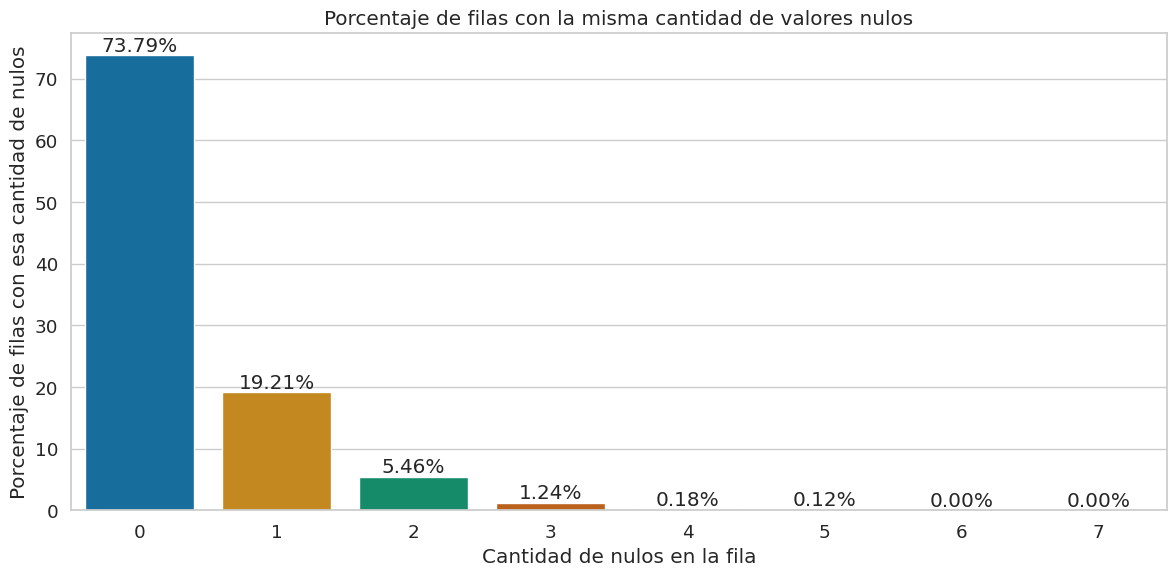

In [ ]:
# Creo una figura para almacenar mi grafica
plt.figure(figsize=(12, 6))

# Calculo el porcentaje de valores nulos que tengo en cada columna.
porcentaje_de_nulos = ds_properati.isnull().sum(axis=1).value_counts(normalize=True) * 100

# Ordeno los porcentajes de mayor a menor para resaltar los mas problematicos.
porcentaje_de_nulos = porcentaje_de_nulos.sort_values(ascending=False)

# Grafico mis datos.
sns.barplot(x = porcentaje_de_nulos.index,
            y = porcentaje_de_nulos.values,
            palette="colorblind")

# Agrego etiquetas de porcentaje en las barras
for index, value in enumerate(porcentaje_de_nulos):
    plt.text(index, value, f"{value:.2f}%", ha="center", va="bottom")

plt.xlabel("Cantidad de nulos en la fila") # agrego un label al eje x
plt.ylabel("Porcentaje de filas con esa cantidad de nulos") # agrego un label al eje y
plt.title("Porcentaje de filas con la misma cantidad de valores nulos")

plt.tight_layout()
plt.show()

#### 2.3.3 - Manejo de datos faltantes

1) Procedemos a eliminar las filas que posean valores nulos en las variables `latitud` y `longitud`. Esto es debido a que posteriormente necesitaremos la ubicacion precisa de cada propiedad.

In [ ]:
# Muestro la cantidad de valores nulos en cada variable.
print("Valores nulos antes de la limpieza:\n")
print(ds_properati.isnull().sum().sort_values(ascending=False))

# Elimino las filas con valores nulos en latitud o longitud
ds_properati.dropna(subset=["latitud", "longitud"], inplace=True)
ds_properati.reset_index(drop=True, inplace=True)

# Separador
print("\n" + "*" * 30 + "\n")

# Muestro la cantidad de valores nulos en cada variable.
print("Valores nulos luego de la limpieza:\n")
print(ds_properati.isnull().sum().sort_values(ascending=False))

Valores nulos antes de la limpieza:

property_bedrooms           10490
end_date                     4775
property_surface_total       4571
property_surface_covered     3192
property_rooms                921
place_l3                      247
start_date                      0
latitud                         0
longitud                        0
property_type                   0
property_price                  0
dtype: int64

******************************

Valores nulos luego de la limpieza:

property_bedrooms           10490
end_date                     4775
property_surface_total       4571
property_surface_covered     3192
property_rooms                921
place_l3                      247
start_date                      0
latitud                         0
longitud                        0
property_type                   0
property_price                  0
dtype: int64


2) No creemos que la variable `end_date` vaya a ser de gran utilidad para los analisis que siguen, con lo cual nos vamos a deshacer de ella y conservar las filas que tenian valores nulos en esta variable.

In [ ]:
# Muestro la cantidad de valores nulos en cada variable.
print("Valores nulos antes de la limpieza:\n")
print(ds_properati.isnull().sum().sort_values(ascending=False))

# Elimino la variable end_date
ds_properati.drop("end_date", axis=1, inplace=True)

# Separador
print("\n" + "*" * 30 + "\n")

# Muestro la cantidad de valores nulos en cada variable.
print("Valores nulos luego de la limpieza:\n")
print(ds_properati.isnull().sum().sort_values(ascending=False))

Valores nulos antes de la limpieza:

property_bedrooms           10490
end_date                     4775
property_surface_total       4571
property_surface_covered     3192
property_rooms                921
place_l3                      247
start_date                      0
latitud                         0
longitud                        0
property_type                   0
property_price                  0
dtype: int64

******************************

Valores nulos luego de la limpieza:

property_bedrooms           10490
property_surface_total       4571
property_surface_covered     3192
property_rooms                921
place_l3                      247
start_date                      0
latitud                         0
longitud                        0
property_type                   0
property_price                  0
dtype: int64


3) Si bien en la variable `place_l3` tengo varios nulos, quizas podamos obtener estos valores utilizando la latitud y longitud de las propiedades. Pero para lograr esto, primero tenemos que deshacernos aquellas propiedad cuya latitud y longitud este fuera de la CABA.

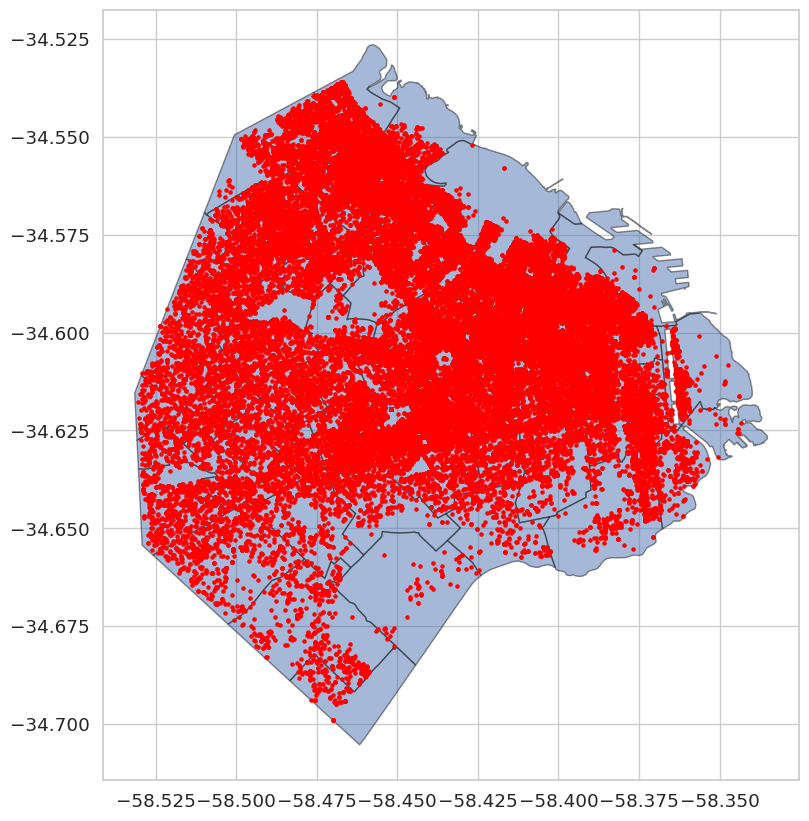

In [ ]:
# Paso 1: Filtramos puntos dentro de los límites de CABA utilizando el archivo GeoJSON de barrios
# Cargar el archivo GeoJSON de los barrios de CABA
barrios_caba = gpd.read_file(ruta + "barrios_caba.geojson")

# Convertir latitud y longitud en puntos geométricos
geometry = [Point(xy) for xy in zip(ds_properati["longitud"], ds_properati["latitud"])]
crs = {"init": "epsg:4326"}  # Sistema de coordenadas WGS84

# Crear un GeoDataFrame a partir del DataFrame limpio y los puntos geométricos
gdf_properati = gpd.GeoDataFrame(
    ds_properati,
    crs=crs,
    geometry=geometry
    )

# Realizar una operación de espacio para encontrar los puntos dentro de los límites de CABA
gdf_properati_caba = gpd.sjoin(
    gdf_properati,
    barrios_caba,
    how="inner",
    op="within"
    )

# Paso 2: Plotear el resultado sobre un mapa
import matplotlib.pyplot as plt

# Plotear los barrios de CABA
barrios_caba.plot(
    alpha=0.5,
    edgecolor="k",
    figsize=(10, 10)
    )

# Plotear los puntos filtrados
gdf_properati_caba.plot(
    ax=plt.gca(),
    marker="o",
    color="red",
    markersize=5
    )

# Muestro toda la grafica.
plt.show()

# Paso 3: Me quedo solo con los puntos de interes del dataset.

# Obtener los índices de las filas filtradas en gdf_properati_caba
indices_filtrados = gdf_properati_caba.index

# Limpiar el DataFrame original usando los índices filtrados
ds_properati = ds_properati.loc[indices_filtrados]

# Reindexar el DataFrame para actualizar los índices
ds_properati.reset_index(drop=True, inplace=True)

# Ahora ds_properati contendrá solo los datos que están dentro de los límites de CABA y tendrá índices actualizados


Ahora que eliminamos las propiedades que estaban fuera de CABA, vamos a usar las variables `latitud` y `longitud` para obtener los barrios que nos faltan en `place_l3`

In [ ]:
# Muestro la cantidad de valores nulos en cada variable.
print("Valores nulos antes de la limpieza:\n")
print(ds_properati.isnull().sum().sort_values(ascending=False))


# Cargar el archivo GeoJSON con los barrios
barrios = gpd.read_file(ruta + "barrios_caba.geojson")

# Crear una geometría Point para cada propiedad en el dataset
geometry = [Point(xy) for xy in zip(ds_properati.longitud, ds_properati.latitud)]
crs = {"init": "epsg:4326"}  # Definir el sistema de referencia de coordenadas (WGS84)

# Crear un GeoDataFrame a partir del dataset con las geometrías Point
gdf = gpd.GeoDataFrame(ds_properati, crs=crs, geometry=geometry)

# Asignar el valor de barrio correspondiente a cada propiedad con valores nulos
for index_propiedad, row_propiedad in gdf[gdf["place_l3"].isnull()].iterrows():
    for index_barrio, row_barrio in barrios.iterrows():
        polygon = row_barrio["geometry"]
        if row_propiedad["geometry"].within(polygon):
            gdf.loc[index_propiedad, "place_l3"] = row_barrio["BARRIO"].title()
            break  # Detener la búsqueda después de encontrar el primer barrio que contiene la propiedad


ds_properati["place_l3"] = gdf["place_l3"]

# Separador
print("\n" + "*" * 30 + "\n")

# Muestro la cantidad de valores nulos en cada variable.
print("Valores nulos luego de la limpieza:\n")
print(ds_properati.isnull().sum().sort_values(ascending=False))

Valores nulos antes de la limpieza:

property_bedrooms           10477
property_surface_total       4549
property_surface_covered     3191
property_rooms                869
place_l3                       51
start_date                      0
latitud                         0
longitud                        0
property_type                   0
property_price                  0
dtype: int64

******************************

Valores nulos luego de la limpieza:

property_bedrooms           10477
property_surface_total       4549
property_surface_covered     3191
property_rooms                869
start_date                      0
latitud                         0
longitud                        0
place_l3                        0
property_type                   0
property_price                  0
dtype: int64


#### 2.3.4 - Imputación de datos

1) Vamos a imputar los valores nulos de las columnas `property_bedrooms` (dormitorios) y `property_rooms` (ambientes) mediante un modelo de regresión lineal utilizando IterativeImputer.

Al modelo le vamos a pasar, ademas de las columnas mencionadas arriba, las columnas `latitud`, `longitud` y `property_type` para que este pueda utilizarlass como referencia, y asi aprovechar mejor la información disponible para imputar los valores faltantes de manera más precisa.

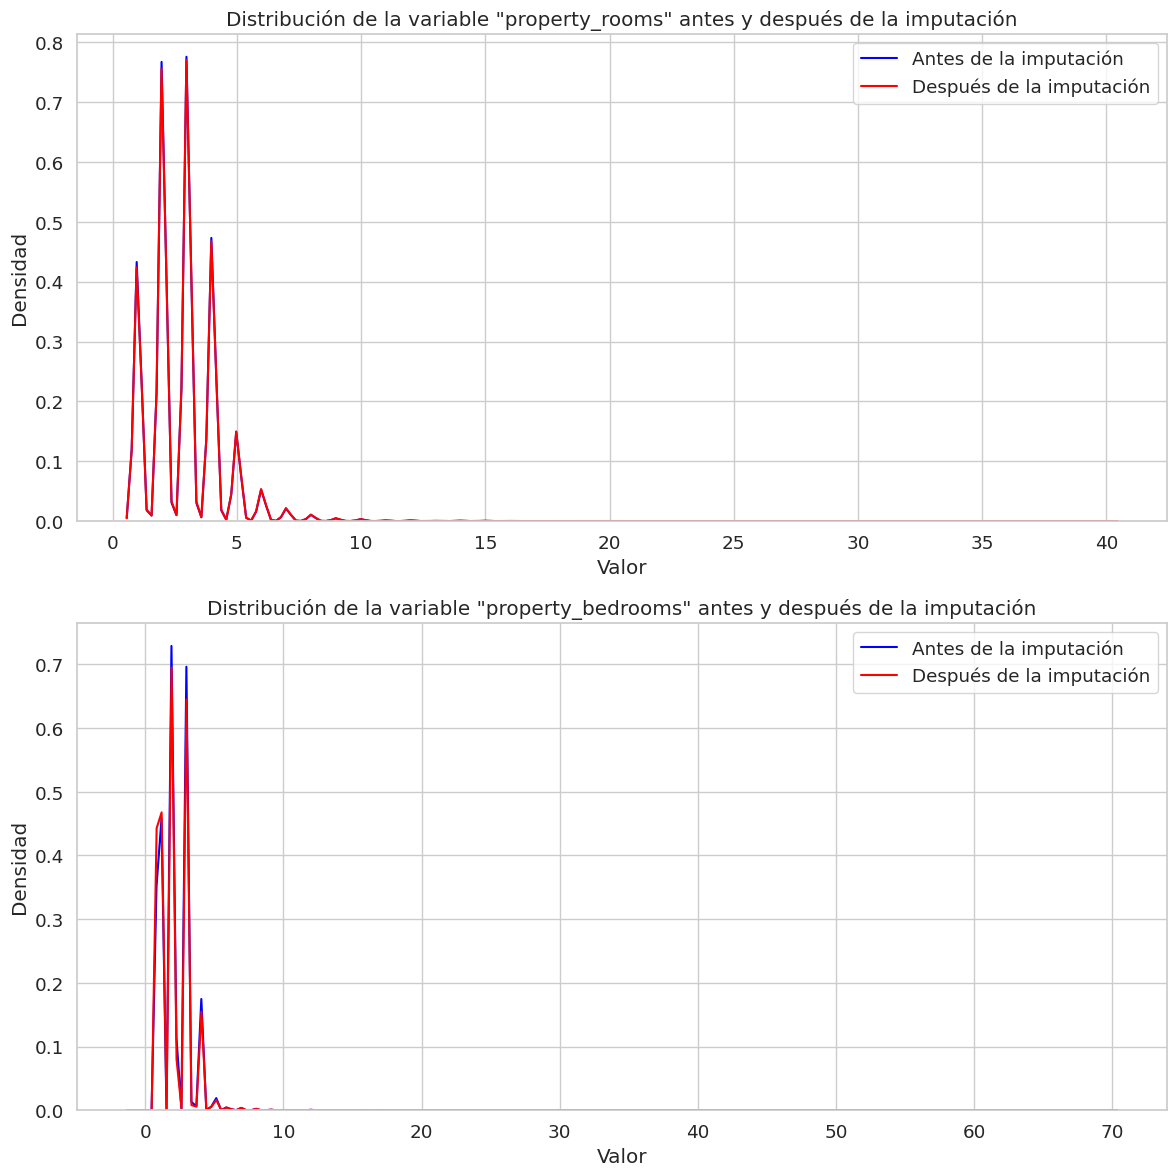

In [ ]:
# Copio las columnas que voy a usar de base para la imputacion.
columnas_a_imputar=["property_rooms", "property_bedrooms", "property_type", "latitud", "longitud"]
df_con_nulos = ds_properati[columnas_a_imputar].copy()

# Hago un One Hot Encoding para poder usar la variable categorica property_type.
df_con_nulos = pd.get_dummies(df_con_nulos, columns=["property_type"], drop_first=True)

# Armo mi modelo
regresion_lineal = LinearRegression()
imputador = IterativeImputer(estimator=regresion_lineal,
                             missing_values=np.nan,
                             max_iter=20,
                             verbose=0,
                             random_state=0)

# Entreno al modelo y guardo el resultado
valores_a_imputar = imputador.fit_transform(df_con_nulos)

# Lo convierto en un DataFrame con los nombres originales de las columnas
valores_a_imputar = pd.DataFrame(valores_a_imputar, columns=df_con_nulos.columns)

# Redondeo los valores imputados a enteros
valores_a_imputar["property_rooms"] = valores_a_imputar["property_rooms"].round().astype(int)
valores_a_imputar["property_bedrooms"] = valores_a_imputar["property_bedrooms"].round().astype(int)


# Filtro las imputaciones donde property_rooms quedo menor o igual a property_bedrooms
# Hago esto para no imputar outliers en mi dataset, pero filtro solo los valores que impute yo
# para no modificar los outliers que puedo traer el propio dataset.

# Me hago un listado de las filas donde property_bedrooms era nulo.
filas_con_nulos = ds_properati[ds_properati["property_bedrooms"].isnull()]

# Si property_rooms = 1 => property_bedrooms = 1
# Si property_rooms > 1 => property_bedrooms = property_rooms -1
filas_con_nulos["property_bedrooms"] = filas_con_nulos.apply(lambda row: row["property_rooms"] - 1 if row["property_rooms"] > 1 else 1, axis=1)

# Actualizo valores a imputar.
valores_a_imputar.update(filas_con_nulos)


# Guardo los resultados en mi DataFrame original.
columnas = ["property_rooms","property_bedrooms"]
ds_properati[columnas] = valores_a_imputar[columnas]


# Grafico la distribución antes y después de la imputación.
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.kdeplot(df_con_nulos["property_rooms"], color="blue", label="Antes de la imputación")
sns.kdeplot(valores_a_imputar["property_rooms"], color="red", label="Después de la imputación")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución de la variable \"property_rooms\" antes y después de la imputación")
plt.legend()

plt.subplot(2, 1, 2)
sns.kdeplot(df_con_nulos["property_bedrooms"], color="blue", label="Antes de la imputación")
sns.kdeplot(valores_a_imputar["property_bedrooms"], color="red", label="Después de la imputación")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución de la variable \"property_bedrooms\" antes y después de la imputación")
plt.legend()

plt.tight_layout()  # Ajusta automáticamente el diseño para evitar solapamientos
plt.show()

In [ ]:
# Chequeamos que quedo todo listo para estas variables.
ds_properati.isna().sum()

start_date                     0
latitud                        0
longitud                       0
place_l3                       0
property_type                  0
property_rooms                 0
property_bedrooms              0
property_surface_total      4549
property_surface_covered    3191
property_price                 0
dtype: int64

2) Repetimos el proceso, ahora para las variables `property_surface_total` (Superficie total) y `property_surface_covered` (Superficie total cubierta) mediante un modelo de regresión lineal utilizando IterativeImputer.

Al modelo le vamos a pasar, ademas de las columnas mencionadas arriba, las columnas `latitud`, `longitud`, `property_type` y `property_rooms` para que este pueda utilizarlass como referencia, y asi aprovechar mejor la información disponible para imputar los valores faltantes de manera más precisa.

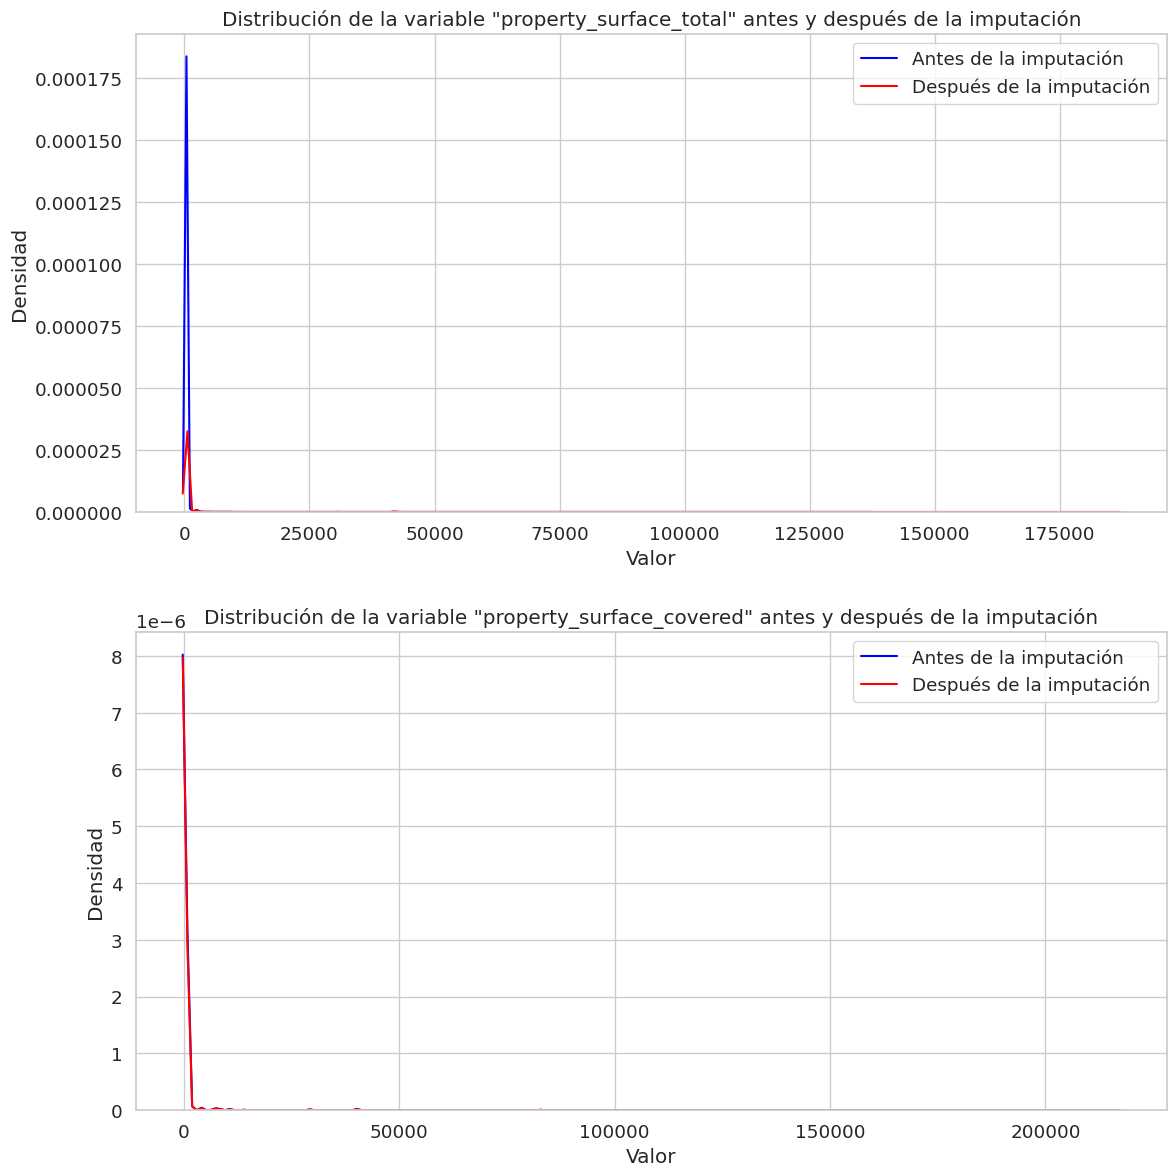

In [ ]:
# Copio las columnas que voy a usar de base para la imputacion.
columnas_a_imputar=["property_surface_total", "property_surface_covered", "latitud", "longitud", "property_type", "property_rooms"]
df_con_nulos = ds_properati[columnas_a_imputar].copy()

# Hago un One Hot Encoding para poder usar la variable categorica property_type.
df_con_nulos = pd.get_dummies(df_con_nulos, columns=["property_type"], drop_first=True)

# Armo mi modelo
regresion_lineal = LinearRegression()
imputador = IterativeImputer(estimator=regresion_lineal,
                             missing_values=np.nan,
                             max_iter=20,
                             verbose=0,
                             random_state=0)

# Entreno al modelo y guardo el resultado
valores_a_imputar = imputador.fit_transform(df_con_nulos)

# Lo convierto en un DataFrame con los nombres originales de las columnas
valores_a_imputar = pd.DataFrame(valores_a_imputar, columns=df_con_nulos.columns)

# Guardo los resultados en mi DataFrame original.
columnas = ["property_surface_total", "property_surface_covered"]
ds_properati[columnas] = valores_a_imputar[columnas]


# Grafico la distribución antes y después de la imputación.
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.kdeplot(df_con_nulos["property_surface_total"], color="blue", label="Antes de la imputación")
sns.kdeplot(valores_a_imputar["property_surface_total"], color="red", label="Después de la imputación")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución de la variable \"property_surface_total\" antes y después de la imputación")
plt.legend()

plt.subplot(2, 1, 2)
sns.kdeplot(df_con_nulos["property_surface_covered"], color="blue", label="Antes de la imputación")
sns.kdeplot(valores_a_imputar["property_surface_covered"], color="red", label="Después de la imputación")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución de la variable \"property_surface_covered\" antes y después de la imputación")
plt.legend()

plt.tight_layout()  # Ajusta automáticamente el diseño para evitar solapamientos
plt.show()

In [ ]:
# Chequeamos que quedo todo listo para estas variables.
ds_properati.isna().sum()

start_date                  0
latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
dtype: int64

### 2.4. Valores atípicos

En esta sección vamos a analizar la existencia de valores atípicos.

* Detectar valores atípicos en los datos tanto en forma univariada como multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados.
* Decidir el tratamiento a aplicar sobre los mismos.
* Analizar la relación entre el precio de venta y los metros de superficie ¿hay valores atípicos que no se detectaron previamente?

#### 2.4.1. Análisis Univariado

Vamos a analizar, mediante el uso de boxplots, las variables `property_rooms`, `property_bedrooms`, `property_surface_total`, `property_surface_covered` y `property_price` en busca de valores atipicos. En este analisis vamos a hacer una distinción segun el tipo de propiedad estudiada (Depto, Casa, PH)

</br>

**Criterios elegidos**

En el analisis de los boxplots, consideraremos como outliers a aquellas observaciones que se encuentren a una distancia de $3*IQR$, es decir, 3 veces el rango intercuartilico, en lugar de $1.5*IQR$ (como viene por defecto).

Tomamos esta decision debido a que observamos que al usar el valor por defecto, perdiamos gran parte de la observaciones que se encontraban dentro de rangos de valores relativamente "comunes" en lo que a propiedades se refiere. De esta forma nos aseguramos que solo se consideren outliers a aquellas observaciones que se alejen en demasia de la media.


Dado que vamos a graficar varios boxplot, me defino una funcion para plotearlos mas facilmente

In [ ]:
#
# Esta funcion se encarga de plotear los boxplots para la variable_a_analizar
# del dataframe ds_properati, diferenciando por tipo de propiedad.
#
def boxplot_para_outliers(variable_a_analizar, etiqueta_eje_y, titulo_del_grafico):

  # Creo la figura donde voy a almacenar mis graficos
  fig, axs = plt.subplots(1, 3, figsize=(16, 5))
  fig.suptitle(titulo_del_grafico)

  # Creo un diccionario para almacenar las divisiones de mis boxplots
  datos_boxplot = {}

  # Hago mis boxplots
  for indice, tipo_de_propiedad in enumerate(["Departamento", "Casa", "PH"]):

    # Separo el tipo de propiedad que me interesa analizar (Depto, casa o PH)
    propiedades = ds_properati[ds_properati["property_type"]  == tipo_de_propiedad]

    # Calculo los cuartiles
    quartiles = propiedades[variable_a_analizar].quantile([0.25, 0.5, 0.75])

    # Calcular los valores de los bigotes
    iqr = quartiles.iloc[2] - quartiles.iloc[0]
    bigote_inferior = max(np.min(propiedades[variable_a_analizar]), quartiles.iloc[0] - 3 * iqr)
    bigote_superior = min(np.max(propiedades[variable_a_analizar]), quartiles.iloc[2] + 3 * iqr)

    # Almacena los valores en un diccionario
    limites_boxplot = {
        "+3 * IQR": bigote_superior,
        "Q3": quartiles.iloc[2],
        "Q2": quartiles.iloc[1],
        "Q1": quartiles.iloc[0],
        "-3 * IQR": bigote_inferior
    }

    # Hago una lista de colores para la grafica (Asi los tres graficos no quedan del mismo color.)
    colores = sns.color_palette("colorblind")

    # Hago el boxplot
    sns.boxplot(
        data = propiedades,
        y = variable_a_analizar,
        whis = 3, # Distancia intercuartilica donde ubico los bigotes
        color = colores[indice],
        ax = axs[indice],
        width=0.5 # ancho del boxplot
    ).set(
        xlabel = tipo_de_propiedad,
        ylabel = etiqueta_eje_y
    )

    # Creo una caja de texto para mostrar los valores de IQR y los bigotes

    # Defino los límites de la caja de texto
    bbox_props = dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=1)

    # String donde voy a almacenar el texto de mi cuadro.
    leyenda_cuadro = f""

    # Cargo el texto del cuadro en el String.
    for leyenda, valor in limites_boxplot.items():
      leyenda_cuadro += f"{leyenda}: {valor:.2f}\n"

    # Elimino el ultimo salto de linea
    leyenda_cuadro = leyenda_cuadro[:-2]

    # Agrego mi cuadro al subplot.
    axs[indice].text(0.02, 0.95, leyenda_cuadro, transform=axs[indice].transAxes, bbox=bbox_props, verticalalignment="top", fontsize=8)

    # guardo las divisiones de mi boxplot
    datos_boxplot[tipo_de_propiedad] = limites_boxplot

  fig.show()

  return datos_boxplot

Tambien defino una funcion para poder eliminar los outliers facilmente

In [ ]:
#
# Esta funcion se encarga de buscar las propiedades cuya variable "variable"
# tenga valores por encima de "cantidad_maxima_segun_tipo" y eliminarlas del dataset
#
def eliminar_outliers(variable, cantidad_maxima_segun_tipo):

  for tipo_de_propiedad, cantidad_maxima in cantidad_maxima_segun_tipo.items():

    # Calculo las filas a borrar.
    propiedades_a_borrar = (ds_properati["property_type"]  == tipo_de_propiedad) & (ds_properati[variable] > cantidad_maxima)
    cantidad = propiedades_a_borrar.sum()

    # Borro las filas
    ds_properati.drop(ds_properati[propiedades_a_borrar].index, inplace = True)
    ds_properati.reset_index(drop = True, inplace = True)

    # Muestro cuantos registros borre.
    print(f"Se borraron {cantidad} {tipo_de_propiedad}s considerados outliers")

Hechas estas aclaraciones y la implementacion de las herramientas a usar, comenzamos con el analisis.

##### 2.4.1.1. Variable `property_rooms` (ambientes)

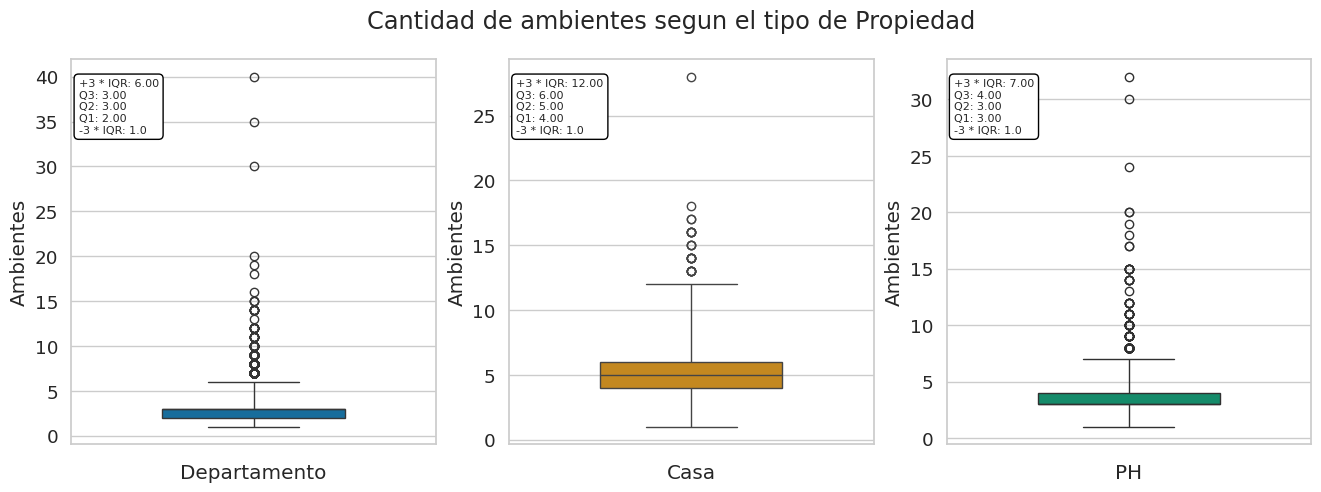

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_rooms",
    etiqueta_eje_y = "Ambientes",
    titulo_del_grafico = "Cantidad de ambientes segun el tipo de Propiedad"
)

En base a las graficas arriba desplegada, se obtuvieron las siguientes observaciones:

- En las propiedades de tipo **Departamento** vemos que la gran mayoria de los outliers se ubican por encima de los 6 y hasta los 20 ambientes. Ademas, vemos que tenemos tres excepciones con 30, 35 y 40 ambientes respectivamente.

- Luego, en las propiedades de tipo **Casa** podemos observar que la gran mayoria de los outliers se ubican por encima de los 12 y por debajo de los 20 ambientes. Ademas, tenemos una propiedad en particular por encima de los 25 ambientes.

- Finalmente, en las propiedades de tipo **PH**, vemos como la mayoria de los outliers se oscilan por encima de los 7 y hasta los 15 ambientes. Luego, hay un grupo menor que oscila por encima de los 15 y los 20 ambientes. Y finalmente, algunos casos esporadicos por encima de los 20 ambientes.

</br>

**Conclusion:**

Concluimos que las propiedades que cuentan con una cantidad de ambientes por encima del valor de su bigote superior es debido a que, o bien ocurrio un error durante la carga de los datos, o bien, se trata de propiedades cuyas caracteristicas exceden en demasia lo que se consideraria una cantidad de ambientes "normal" para una vivienda.

Dado que, consideramos que los valores que esten por encima de esto no son representativos del mercado que se busca estudiar, se decidio eliminar los siguientes registros:

- Departamentos con más de 6 ambientes.
- Casas con más de 12 ambientes.
- PHs con más de 7 ambientes.

In [ ]:
# Cantidad maxima de ambientes segun el tipo de propiedad.
cantidad_maxima_segun_tipo = {
    "Departamento" : datos_boxplot["Departamento"]["+3 * IQR"],
    "Casa" : datos_boxplot["Casa"]["+3 * IQR"],
    "PH" : datos_boxplot["PH"]["+3 * IQR"]
}

eliminar_outliers("property_rooms", cantidad_maxima_segun_tipo)

Se borraron 665 Departamentos considerados outliers
Se borraron 24 Casas considerados outliers
Se borraron 135 PHs considerados outliers


Volvemos a graficar los boxplots luego del filtrado.

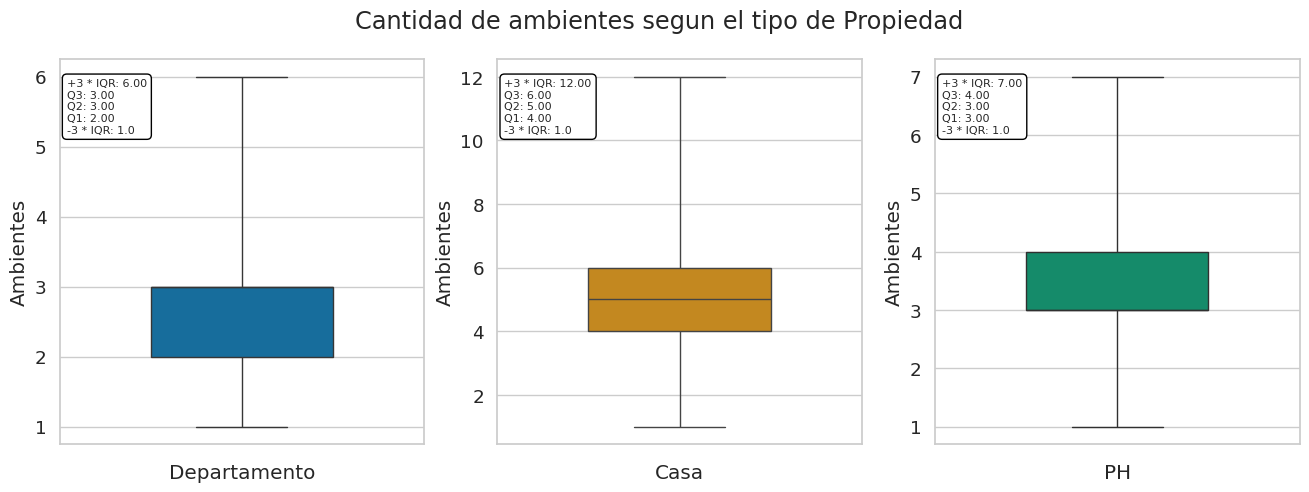

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_rooms",
    etiqueta_eje_y = "Ambientes",
    titulo_del_grafico = "Cantidad de ambientes segun el tipo de Propiedad"
)

##### 2.4.1.2. Variable `property_bedrooms` (dormitorios)

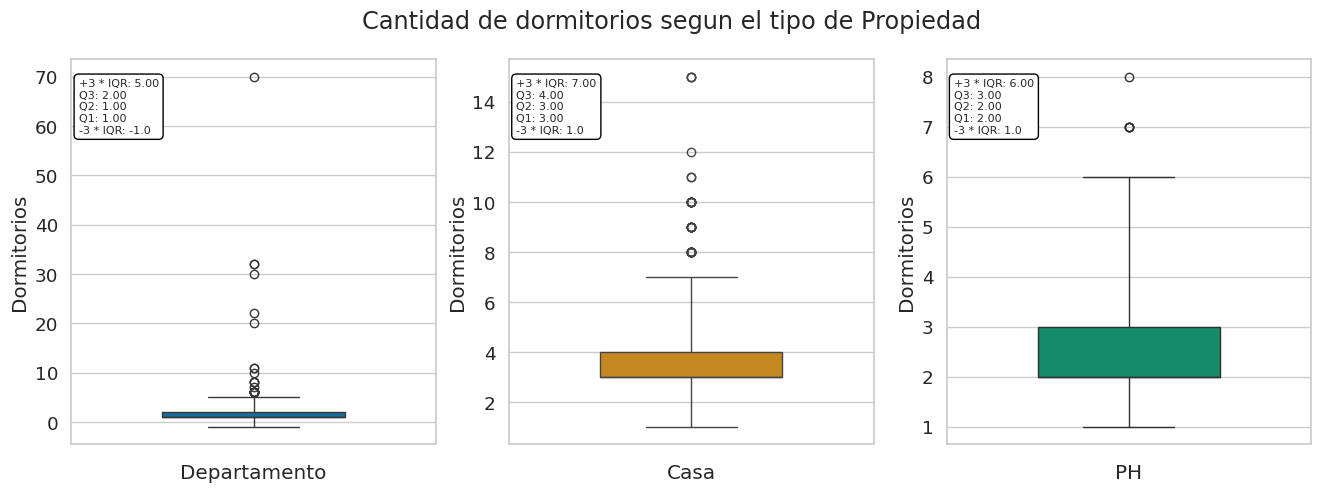

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_bedrooms",
    etiqueta_eje_y = "Dormitorios",
    titulo_del_grafico = "Cantidad de dormitorios segun el tipo de Propiedad"
)

Dado que en la seccion 2.4.1.1 restringimos el numero de ambientes que podian tener los distintos tipos de propiedades, es obvio que estamos ante la presencia de outliers en los tres casos. Pues es imposible que existan viviendan con un numero de dormitorios mayor a su numero de ambientes.

</br>

Ademas, vemos que hay un caso que llama poderosamente la atencion: En los departamentos parece haber propiedades con una cantidad de dormitorios **negativa**.

Antes de continuar haremos un analisis exhaustivo de estas propiedades para verlas mas en detalle.

In [ ]:
# Muestreo la cantidad de propiedades con una cantidad de dormitorios menor a 1.
cantidad = ds_properati[ds_properati["property_bedrooms"] < 1].shape[0]
print(f"Cantidad de propiedades con numero de habitaciones menor a 1: {cantidad}")

Cantidad de propiedades con numero de habitaciones menor a 1: 1


Afortunadamente se trata de un unico caso. Veamos su indice para analizar si la borramos o no.

In [ ]:
indice = ds_properati[ds_properati["property_bedrooms"] < 1].index
ds_properati.iloc[indice]

start_date    latitud   longitud       place_l3 property_type  \
24938 2021-01-07 -34.577595 -58.495185  Villa Urquiza  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
24938               2                 -1                    61.0   

       property_surface_covered  property_price  
24938                      43.0        125000.0

Dado que estamos ante un departamento de 2 ambientes, suponemos que hubo un error durante la carga del numero de dormitorios, tratandose en realidad de una vivienda con 1 dormitorio. Corregimos debajo este caso y seguimos con el analisis.

In [ ]:
ds_properati.at[indice[0],"property_bedrooms"] = 1
ds_properati.iloc[indice]

start_date    latitud   longitud       place_l3 property_type  \
24938 2021-01-07 -34.577595 -58.495185  Villa Urquiza  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
24938               2                  1                    61.0   

       property_surface_covered  property_price  
24938                      43.0        125000.0

Resuelto ese caso en particular, tenemos que analizar lo siguiente:

En este estudio mediante boxplots puede haber outliers que queden solapados. Por ejemplo: Una casa de 2 ambientes que tenga 3 dormitorios no saldra como un outlier en el boxplot (esto lo resolveremos mas adelante cuando hagamos el analisis multivariado).

De momento para poner un limite superior al numero de dormitorios, procederemos dejar unicamente las propiedades que esten por debajo del bigote superior en cuanto a cantidad de habitaciones.

- Departamentos que cuenten con más de 5 dormitorios.
- Casas que cuenten con más de 7 dormitorios.
- PHs que cuenten con más de 6 dormitorios.


In [ ]:
# Cantidad maxima de dormitorios segun el tipo de propiedad.
cantidad_maxima_segun_tipo = {
    "Departamento" : datos_boxplot["Departamento"]["+3 * IQR"],
    "Casa" : datos_boxplot["Casa"]["+3 * IQR"],
    "PH" : datos_boxplot["PH"]["+3 * IQR"]
}

eliminar_outliers("property_bedrooms", cantidad_maxima_segun_tipo)

Se borraron 26 Departamentos considerados outliers
Se borraron 50 Casas considerados outliers
Se borraron 5 PHs considerados outliers


Volvemos a graficar los boxplots luego del filtrado.

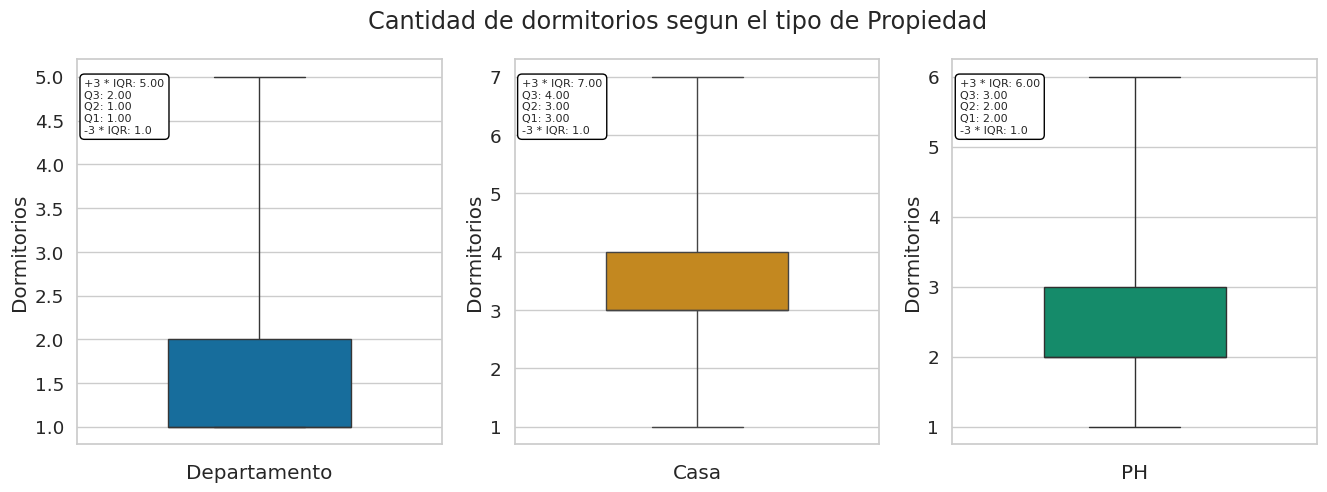

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_bedrooms",
    etiqueta_eje_y = "Dormitorios",
    titulo_del_grafico = "Cantidad de dormitorios segun el tipo de Propiedad"
)

##### 2.4.1.3. Variable `property_surface_total` (superficie total)

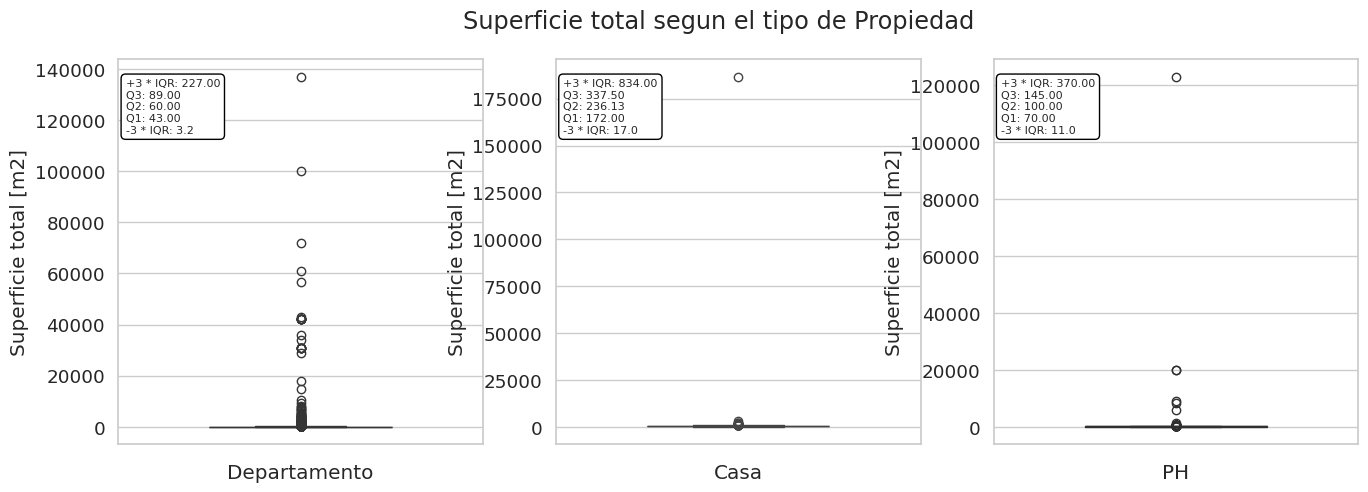

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_surface_total",
    etiqueta_eje_y = "Superficie total [m2]",
    titulo_del_grafico = "Superficie total segun el tipo de Propiedad"
)

Como podemos observar en las graficas, tenemos un gran numero de observaciones cuya superficie no se condice con lo que uno esperaria encontrar en la realidad. Sobre todo en el caso de los departamentos, donde hay observaciones con una superficie de 100.000 m2 (aproximadamente 14 canchas de fútbol)

De momento estableceremos como cota superior para la superficie de nuestras propiedades el valor de sus bigotes superiores.

* Departamentos ▶ Maximo 227 $m^2$
* Casas ▶ Maximo 834 $m^2$
* PHs ▶ Maximo 370 $m^2$

Mas adelante, cuando realices el analisis multivariado, haremos un hilado mas fino. Dado que puede haber outliers que queden solapados en este analisis mediante boxplots (por ejemplo, un monoambiente con 200 $m^2$)

In [ ]:
# Cantidad maxima de superficie total segun el tipo de propiedad.
cantidad_maxima_segun_tipo = {
    "Departamento" : datos_boxplot["Departamento"]["+3 * IQR"],
    "Casa" : datos_boxplot["Casa"]["+3 * IQR"],
    "PH" : datos_boxplot["PH"]["+3 * IQR"]
}

eliminar_outliers("property_surface_total", cantidad_maxima_segun_tipo)

Se borraron 2059 Departamentos considerados outliers
Se borraron 55 Casas considerados outliers
Se borraron 74 PHs considerados outliers


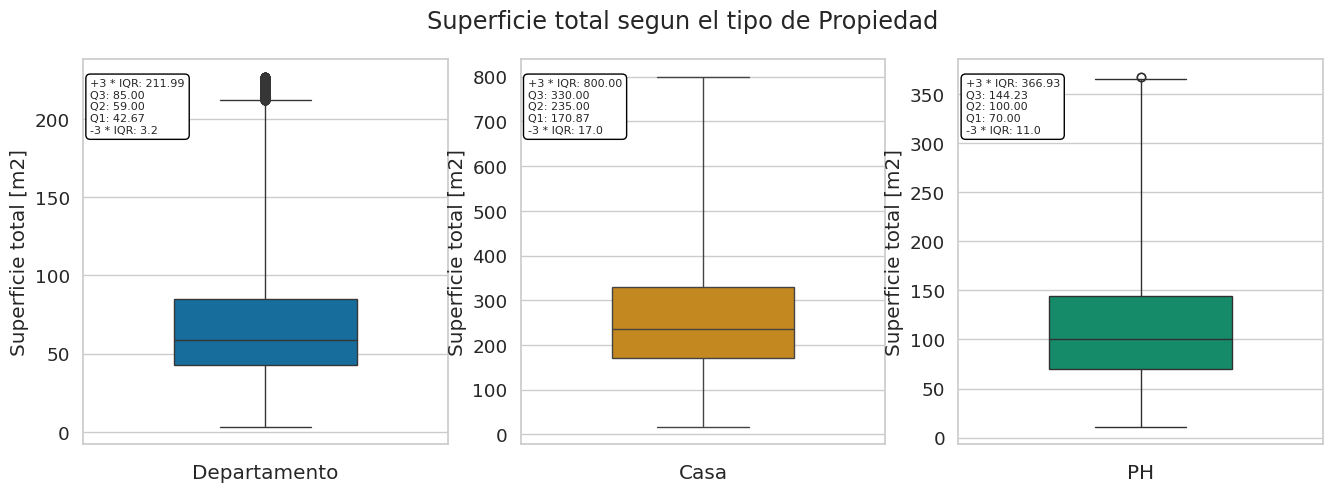

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_surface_total",
    etiqueta_eje_y = "Superficie total [m2]",
    titulo_del_grafico = "Superficie total segun el tipo de Propiedad"
)

En los Departamentos nos quedaron unos cuantos outliers, pero ya nos encargaremos de eso en el analisis multivariado.

En cuanto a los PHs, si bien quedo un outlier, consideramos que esta lo bastante cerca del nuevo bigote superior para considerarlo como un valor aceptable.

##### 2.4.1.4. Variable `property_surface_covered` (superficie cubierta)

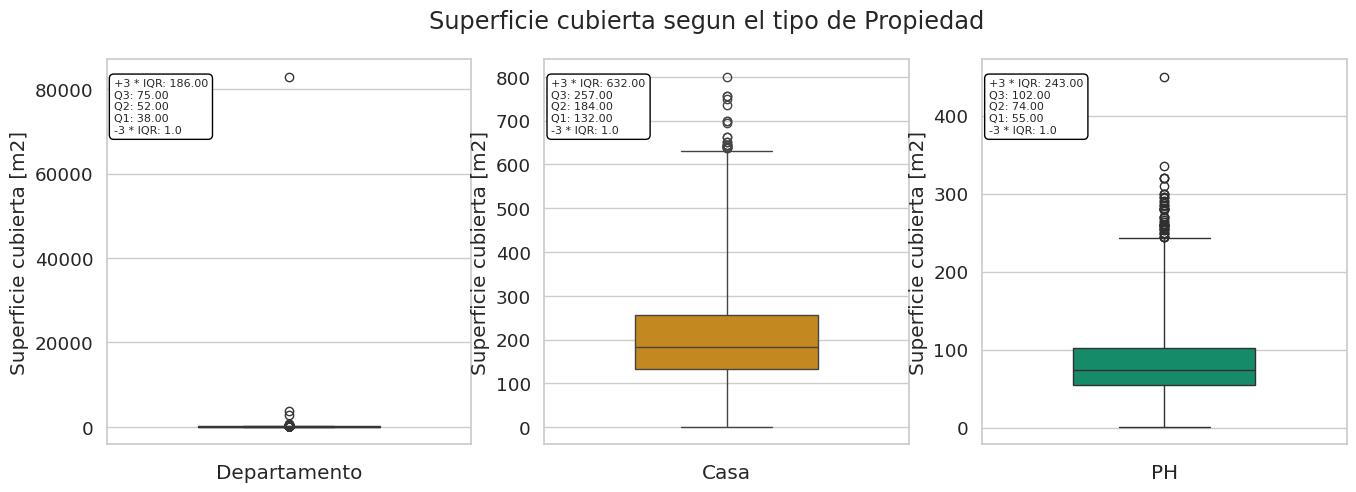

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_surface_covered",
    etiqueta_eje_y = "Superficie cubierta [m2]",
    titulo_del_grafico = "Superficie cubierta segun el tipo de Propiedad"
)

Como podemos observar en las graficas, ocurre algo muy similar a lo que veiamos con la variable `property_surface_total`.

De momento estableceremos como cota superior para la superficie cubierta los mismos valores que habiamos asignado a la variable `property_surface_total`. Dado que me esta dando limites muy bajos el boxplot y no quiero perder tanta data de golpe.

* Departamentos ▶ Maximo 246 $m^2$
* Casas ▶ Maximo 841 $m^2$
* PHs ▶ Maximo 367 $m^2$

In [ ]:
# Superficie cubiera maxima segun el tipo de propiedad.
cantidad_maxima_segun_tipo = {
    "Departamento" : 246,
    "Casa" : 841,
    "PH" : 367
}

eliminar_outliers("property_surface_covered", cantidad_maxima_segun_tipo)

Se borraron 6 Departamentos considerados outliers
Se borraron 0 Casas considerados outliers
Se borraron 1 PHs considerados outliers


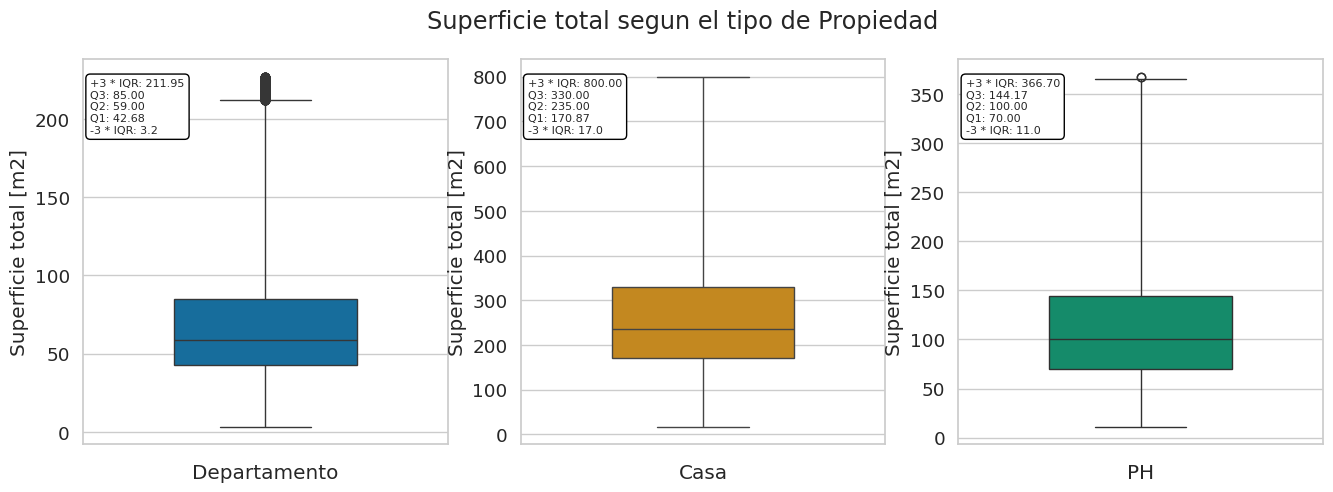

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_surface_total",
    etiqueta_eje_y = "Superficie total [m2]",
    titulo_del_grafico = "Superficie total segun el tipo de Propiedad"
)

Por ahora lo vamos a dejar así y vamos a hacer un ajuste mas fino en analisis multivariado.

##### 2.4.1.5. Variable `property_price` (Precio)

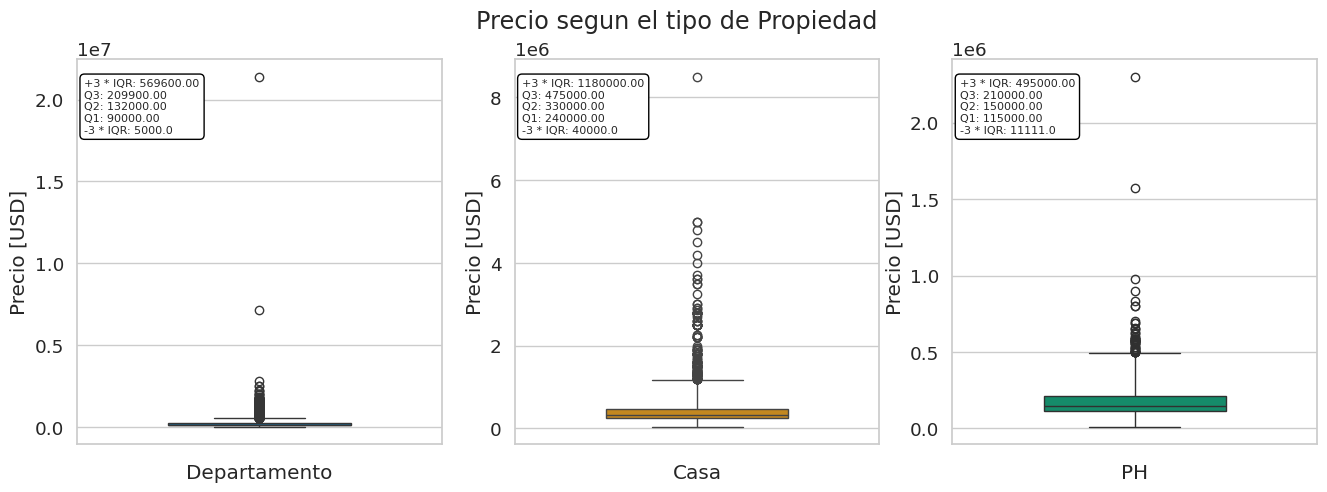

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_price",
    etiqueta_eje_y = "Precio [USD]",
    titulo_del_grafico = "Precio segun el tipo de Propiedad"
)

En esta variable es en donde, probablemente, sea mas inutil hacer un analisis univariado. Dado que el precio de una propiedad varia sustancialmente en base a parametros como la ubicacion, la superficie y la cantidad de ambientes de la misma.

En primera instancia solo vamos a conservar:

* Departamentos ▶ Precio por debajo de 600 K
* Casas ▶ Precio por debajo de 1,2 M
* PHs ▶ Precio por debajo de 500 K

Ademas, vamos a poner un limite inferior de 30 K a todas las propiedades, pues consideramos que es ilogico que haya propiedades en venta por un precio tan bajo.

In [ ]:
# Precio maximo segun el tipo de propiedad.
cantidad_maxima_segun_tipo = {
    "Departamento" : 0.6e6,
    "Casa" : 1.2e6,
    "PH" : 0.5e6
}

eliminar_outliers("property_price", cantidad_maxima_segun_tipo)

# Precio minimo segun el tipo de propiedad.
precio_minimo_segun_tipo = {
    "Departamento" : 30e3,
    "Casa" : 30e3,
    "PH" : 30e3
}

for tipo_de_propiedad, precio_minimo in precio_minimo_segun_tipo.items():

    # Calculo las filas a borrar.
    propiedades_a_borrar = (ds_properati["property_type"]  == tipo_de_propiedad) & (ds_properati["property_price"] < precio_minimo)
    cantidad = propiedades_a_borrar.sum()

    # Borro las filas
    ds_properati.drop(ds_properati[propiedades_a_borrar].index, inplace = True)
    ds_properati.reset_index(drop = True, inplace = True)

    # Muestro cuantos registros borre.
    print(f"Se borraron {cantidad} {tipo_de_propiedad}s considerados outliers")

Se borraron 1772 Departamentos considerados outliers
Se borraron 136 Casas considerados outliers
Se borraron 42 PHs considerados outliers
Se borraron 83 Departamentos considerados outliers
Se borraron 0 Casas considerados outliers
Se borraron 3 PHs considerados outliers


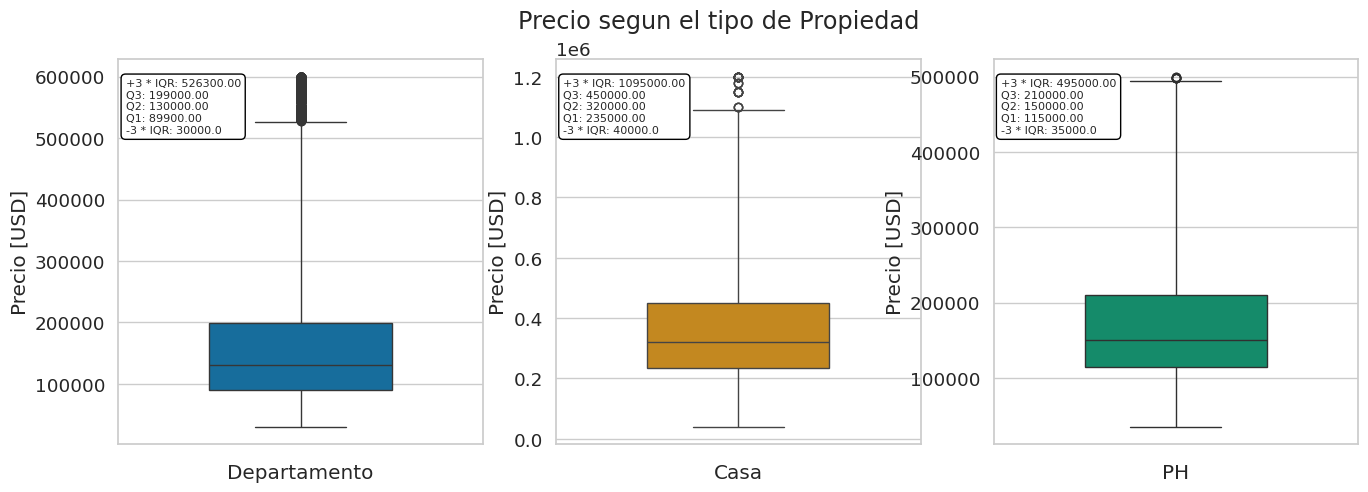

In [ ]:
datos_boxplot = boxplot_para_outliers(
    variable_a_analizar = "property_price",
    etiqueta_eje_y = "Precio [USD]",
    titulo_del_grafico = "Precio segun el tipo de Propiedad"
)

#### 2.4.2. Analisis Multivariado

##### 2.4.2.1. `property_rooms` (ambientes) vs `property_bedrooms` (dormitorios)

Dado que, como dijimos en la seccion 2.4.1.2, pueden haber quedado outliers solapados en mis datos. Por ejemplo: Una casa de 2 ambientes que tenga 3 dormitorios. Haremos lo siguiente:

- Las propiedades de 1 ambiente, deberan tener 1 dormitorio.
- Las propiedades de n ambientes, podran tener como maximo n-1 dormitorios (n > 1)

Considerando que, si bien el dataframe indica `property_bedrooms` (es decir, cantidad de dormitorios) en la venta de propiedades lo que se suele relevar es el numero de **habitaciones** con que cuenta la propiedad sobre el numero de ambientes.

Es decir:
- En una casa de 2 ambientes, tiene 1 habitacion.
- En una casa de 3 ambientes, tiene 2 habitaciones.
- En una casa de 4 ambientes, tiene 3 habitaciones.
- etc.

Graficamos ambientes vs dormitorios para ver si hay outliers.

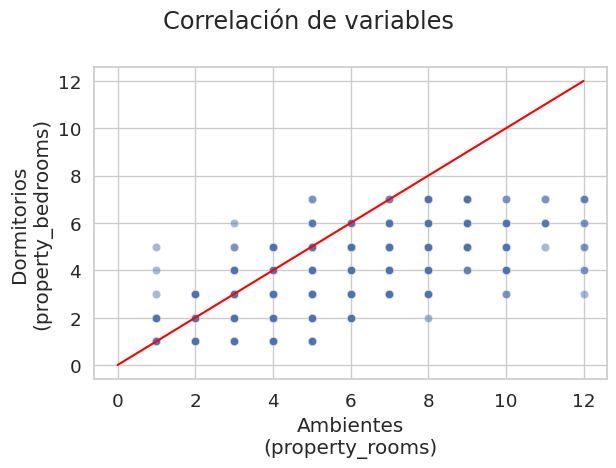

In [ ]:
plt.suptitle("Correlación de variables")

# Armamos un dataframe con las variables a comparar.
df_para_correlaciones = ds_properati[["property_rooms",
                                      "property_bedrooms"]]

# 1- Graficamos ambientes vs habitaciones.
sns.scatterplot(x = "property_rooms",
                y = "property_bedrooms",
                data = df_para_correlaciones,
                alpha = 0.5
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Dormitorios\n(property_bedrooms)")

# Agrego una recta que marca cuantas habitaciones puede tener como maximo
# una propiedad. Pues ninguna propiedad puede tener mas habitaciones que ambientes.
ambientes_max = df_para_correlaciones["property_rooms"].max()
sns.lineplot(x = [0, ambientes_max],
             y = [0, ambientes_max],
             c = 'Red'
             )

plt.tight_layout()


Como podemos observar, hay propiedades en las cuales tenemos mas dormitorios que ambientes. Vamos a corregir eso.

In [ ]:
for tipo_de_propiedad in ["Departamento", "Casa", "PH"]:

  # Calculo las filas a borrar.
  propiedades_a_borrar = ds_properati.apply(lambda x: (x["property_type"] == tipo_de_propiedad) and \
                                                  ((x["property_rooms"] == 1 and x["property_rooms"] < x["property_bedrooms"]) or \
                                                  (x["property_rooms"] > 1 and x["property_rooms"] <= x["property_bedrooms"])), axis=1)
  cantidad = propiedades_a_borrar.sum()

  # Borro las filas
  ds_properati.drop(ds_properati[propiedades_a_borrar].index, inplace = True)
  ds_properati.reset_index(drop = True, inplace = True)

  # Muestro cuantos registros borre.
  print(f"Se borraron {cantidad} {tipo_de_propiedad}s considerados outliers")

Se borraron 733 Departamentos considerados outliers
Se borraron 49 Casas considerados outliers
Se borraron 130 PHs considerados outliers


Hagamos ahora un grafico de dispersion para chequear como quedo la relacion de mis variables.

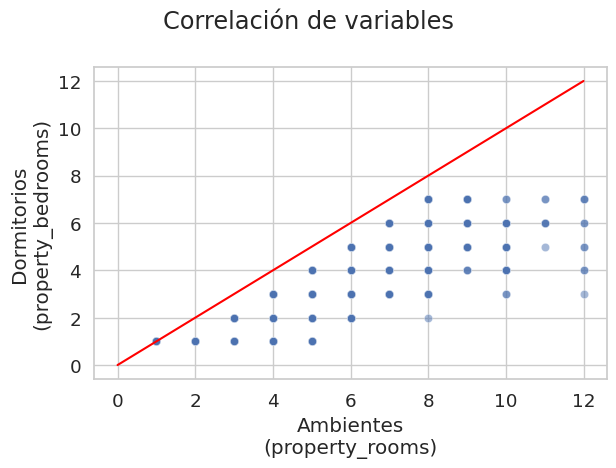

In [ ]:
plt.suptitle("Correlación de variables")

# Armamos un dataframe con las variables a comparar.
df_para_correlaciones = ds_properati[["property_rooms",
                                      "property_bedrooms"]]

# 1- Graficamos ambientes vs habitaciones.
sns.scatterplot(x = "property_rooms",
                y = "property_bedrooms",
                data = df_para_correlaciones,
                alpha = 0.5
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Dormitorios\n(property_bedrooms)")

# Agrego una recta que marca cuantas habitaciones puede tener como maximo
# una propiedad. Pues ninguna propiedad puede tener mas habitaciones que ambientes.
ambientes_max = df_para_correlaciones["property_rooms"].max()
sns.lineplot(x = [0, ambientes_max],
             y = [0, ambientes_max],
             c = 'Red'
             )

plt.tight_layout()

##### 2.4.2.2. `property_rooms` (ambientes) vs `property_surface_total` (superficie)

En la seccion 2.4.1.3 al realizar el analisis univariado de la variable `property_surface_total` lo que hicimos fue establecer una cota superior para la superficie maxima que podian tener los distintos tipos de propiedades.

Esto en el caso de las Casas y los PHs no es tan problematico, pues una casa puede tener tranquilamente 2 ambientes, pero 100 $m^2$ de patio.

El problema de este filtrado surge con los Departamentos donde se puede dar, por ejemplo, el caso de tener un monoambiente que con 200 $m^2$ de superficie.

Para resolver esto recurriremos a un dataset del gobierno de la CABA, en el cual hay un relevamiento de la superficie promedio (en metros cuadrados) en funcion de la cantidad de ambientes de departamentos publicados entre 2010 y 2024.

Dado que este dataset solo contiene data de deptos de 1 a 3 ambientes, tendremos que estimar la superficie de los deptos con un numero de ambientes mayor por otro medio.

In [ ]:
# Cargo mi dataset con las superficies promedio para depto de 1 a 3 ambientes en CABA.
df_superficie_promedio_caba = pd.read_csv(ruta + "superficie_promedio_caba.csv", sep=";")

# Reemplazo las comas por puntos y convierto las superficies a float.
df_superficie_promedio_caba["superficie"] = df_superficie_promedio_caba["superficie"].str.replace(",", ".")
df_superficie_promedio_caba["superficie"] = df_superficie_promedio_caba["superficie"].astype(float)

superficie_media = df_superficie_promedio_caba.groupby("ambientes")["superficie"].mean()

# Mostrar las predicciones
for ambientes, superficie in zip(range(1, 4), superficie_media):
    print(f"Para {ambientes} ambiente/s, la superficie estimada es {superficie:.2f} m2")

Para 1 ambiente/s, la superficie estimada es 32.52 m2
Para 2 ambiente/s, la superficie estimada es 42.54 m2
Para 3 ambiente/s, la superficie estimada es 68.50 m2


Como regla practica, cada tipo de Departamento podra tener como maximo un 25% de superficie por encima del valor que estimo nuestro modelo. (redondeando valores para mayor practicidad)

In [ ]:
from math import ceil

superficie_maxima_deptos = []
for indice, superficie in superficie_media.items():
  superficie_maxima_deptos.append(ceil(superficie*1.25))

for ambientes, superficie in zip(range(1, 4), superficie_maxima_deptos):
    print(f"Para {ambientes} ambiente/s, la superficie maxima sera {superficie} m2")

Para 1 ambiente/s, la superficie maxima sera 41 m2
Para 2 ambiente/s, la superficie maxima sera 54 m2
Para 3 ambiente/s, la superficie maxima sera 86 m2


Para departamentos de 4 a 6 ambientes decidimos tomar los siguientes valores maximos:

* Para 4 ambientes, la superficie maxima sera 120 m2
* Para 5 ambientes, la superficie maxima sera 180 m2
* Para 6 ambientes, la superficie maxima sera 220 m2

Estos valores se estimaron en base a observaciones realizadas sobre las viviendas publicadas en los sitios Zonaprop y Argenprop.

In [ ]:
superficie_maxima_deptos.append(120)
superficie_maxima_deptos.append(180)
superficie_maxima_deptos.append(220)

Antes de borrar nada, veamos la relacion ambientes vs superficie total

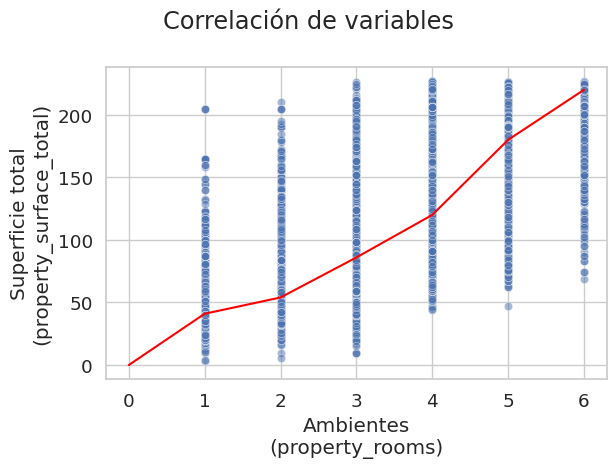

In [ ]:
plt.suptitle("Correlación de variables")

# Armamos un dataframe con las variables a comparar.
df_para_correlaciones = ds_properati[["property_rooms",
                                      "property_surface_total"]]

df_para_correlaciones = df_para_correlaciones.loc[ds_properati["property_type"] == "Departamento"]

# 1- Graficamos ambientes vs habitaciones.
sns.scatterplot(x = "property_rooms",
                y = "property_surface_total",
                data = df_para_correlaciones,
                alpha = 0.5
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Superficie total\n(property_surface_total)")

# Agrego una recta que marca cuantos m2 puede tener como maximo una propiedad de n ambientes
for cantidad_de_ambientes, superficie_maxima in enumerate(superficie_maxima_deptos):

  if cantidad_de_ambientes == 0:
    superficie_minima = 0
  else:
    superficie_minima = superficie_maxima_deptos[cantidad_de_ambientes - 1]

  sns.lineplot(x = [cantidad_de_ambientes, cantidad_de_ambientes + 1],
              y = [superficie_minima, superficie_maxima],
              c = 'Red'
              )

plt.tight_layout()

Hechas estas aclaraciones y calculos. Eliminemos los outliers

In [ ]:
# Cantidad maxima de ambientes segun el tipo de propiedad.
tipo_de_propiedad = "Departamento"

for cantidad_de_ambientes, superficie_maxima in enumerate(superficie_maxima_deptos):

  # Calculo las filas a borrar.
  propiedades_a_borrar = (ds_properati["property_type"]  == tipo_de_propiedad) \
  & (ds_properati["property_rooms"] == cantidad_de_ambientes + 1) \
  & (ds_properati["property_surface_total"] > superficie_maxima)
  cantidad = propiedades_a_borrar.sum()

  # Borro las filas
  ds_properati.drop(ds_properati[propiedades_a_borrar].index, inplace = True)
  ds_properati.reset_index(drop = True, inplace = True)

  # Muestro cuantos registros borre.
  print(f"Se borraron {cantidad} {tipo_de_propiedad}s de {cantidad_de_ambientes + 1} ambiente/s considerados outliers")

Se borraron 3410 Departamentos de 1 ambiente/s considerados outliers
Se borraron 7108 Departamentos de 2 ambiente/s considerados outliers
Se borraron 5023 Departamentos de 3 ambiente/s considerados outliers
Se borraron 3701 Departamentos de 4 ambiente/s considerados outliers
Se borraron 423 Departamentos de 5 ambiente/s considerados outliers
Se borraron 12 Departamentos de 6 ambiente/s considerados outliers


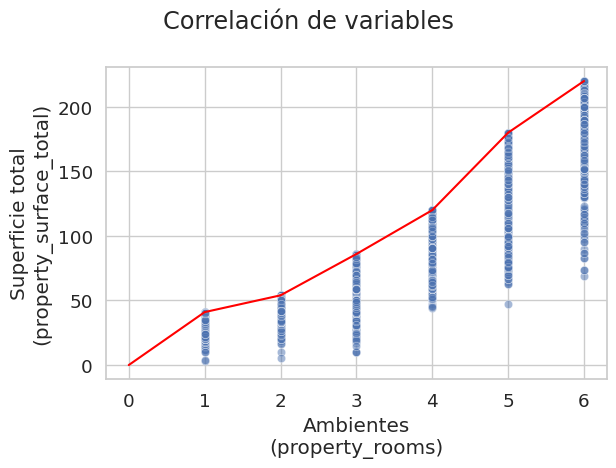

In [ ]:
plt.suptitle("Correlación de variables")

# Armamos un dataframe con las variables a comparar.
df_para_correlaciones = ds_properati[["property_rooms",
                                      "property_surface_total"]]

df_para_correlaciones = df_para_correlaciones.loc[ds_properati["property_type"] == "Departamento"]

# 1- Graficamos ambientes vs habitaciones.
sns.scatterplot(x = "property_rooms",
                y = "property_surface_total",
                data = df_para_correlaciones,
                alpha = 0.5
                ).set(xlabel = "Ambientes\n(property_rooms)",
                      ylabel = "Superficie total\n(property_surface_total)")

# Agrego una recta que marca cuantos m2 puede tener como maximo una propiedad de n ambientes
for cantidad_de_ambientes, superficie_maxima in enumerate(superficie_maxima_deptos):

  if cantidad_de_ambientes == 0:
    superficie_minima = 0
  else:
    superficie_minima = superficie_maxima_deptos[cantidad_de_ambientes - 1]

  sns.lineplot(x = [cantidad_de_ambientes, cantidad_de_ambientes + 1],
              y = [superficie_minima, superficie_maxima],
              c = 'Red'
              )

plt.tight_layout()

Si bien esto ayudo a corregir los maximos, aun falta purgar bastante los minimos. Pues como podemos ver, tengo deptos de 6 ambientes con una superficie de 50 $m^2$

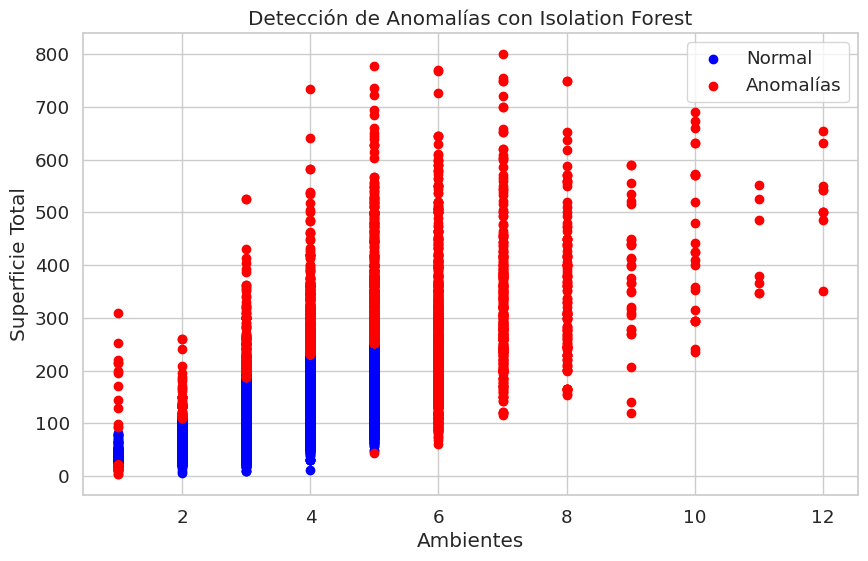


Se eliminaron 3228 propiedades consideradas anomalas


In [ ]:
# Selecciono las características relevantes
features = ds_properati[["property_surface_total", "property_rooms"]]

# Entrenamos el modelo Isolation Forest
isolation_forest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=features.shape[1],
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)
isolation_forest.fit(features)

# Buscamos las anomalias
anomalies = isolation_forest.predict(features)

# Agrega las predicciones al DataFrame original
ds_properati["anomaly_if"] = anomalies

# Filtra los datos para ver las anomalías detectadas
df_normales = ds_properati[ds_properati["anomaly_if"] != -1]
anomalies_df = ds_properati[ds_properati["anomaly_if"] == -1]

# Graficar un scatter plot con los valores anómalos resaltados
plt.figure(figsize=(10, 6))
plt.scatter(df_normales["property_rooms"], df_normales["property_surface_total"], c='blue', label='Normal')
plt.scatter(anomalies_df["property_rooms"], anomalies_df["property_surface_total"], c='red', label='Anomalías')
plt.xlabel("Ambientes")
plt.ylabel("Superficie Total")
plt.title("Detección de Anomalías con Isolation Forest")
plt.legend()
plt.show()

# Elimino los valores que fueron marcados como anomalos
print(f"\nSe eliminaron {anomalies_df.shape[0]} propiedades consideradas anomalas")
ds_properati.drop(anomalies_df.index, inplace=True)
ds_properati.reset_index(drop = True, inplace = True)

# Elimino la columna de las anomalias
ds_properati.drop("anomaly_if", axis=1, inplace=True)

##### 2.4.2.3. `property_surface_total` (superficie total) vs `property_surface_covered` (superficie cubierta)

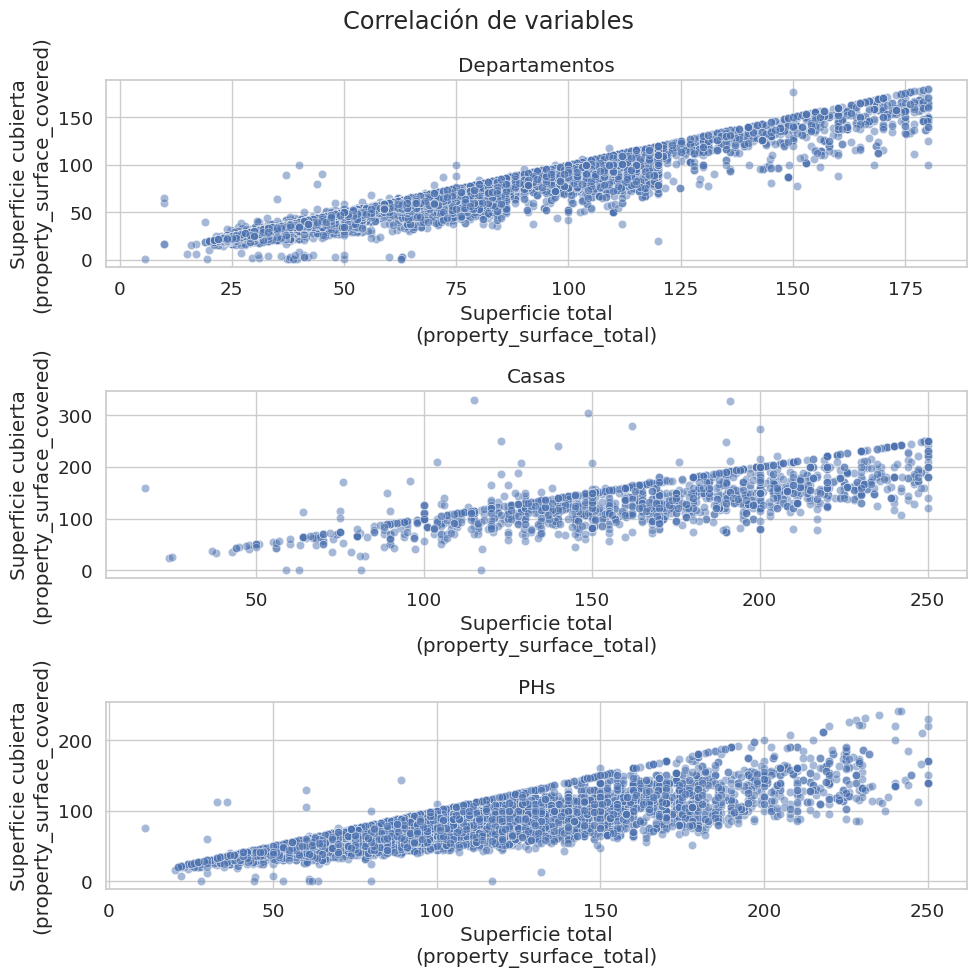

In [ ]:
grafica, ax = plt.subplots(3, 1, figsize=(10, 10))
grafica.suptitle("Correlación de variables")


for indice, tipo_de_propiedad in enumerate(["Departamento", "Casa", "PH"]):

  # Armamos un dataframe con las variables a comparar.
  df_para_correlaciones = ds_properati[["property_surface_total",
                                      "property_surface_covered"]]
  df_para_correlaciones = df_para_correlaciones.loc[ds_properati["property_type"] == tipo_de_propiedad]

  # 1- Graficamos ambientes vs habitaciones.
  sns.scatterplot(x = "property_surface_total",
                  y = "property_surface_covered",
                  data = df_para_correlaciones,
                  alpha = 0.5,
                  ax = ax[indice]
                  ).set(xlabel = "Superficie total\n(property_surface_total)",
                        ylabel = "Superficie cubierta\n(property_surface_covered)")
  ax[indice].set_title(tipo_de_propiedad + "s")

grafica.tight_layout()

Procedemos a eliminar las propiedades con mas superficie cubierta que superficie total.

In [ ]:
# Calculo las filas a borrar.
propiedades_a_borrar = ds_properati["property_surface_total"] < ds_properati["property_surface_covered"]
cantidad = propiedades_a_borrar.sum()

# Borro las filas
ds_properati.drop(ds_properati[propiedades_a_borrar].index, inplace = True)
ds_properati.reset_index(drop = True, inplace = True)

# Muestro cuantos registros borre.
print(f"Se borraron {cantidad} propiedades consideradas outliers")

Se borraron 282 propiedades consideradas outliers


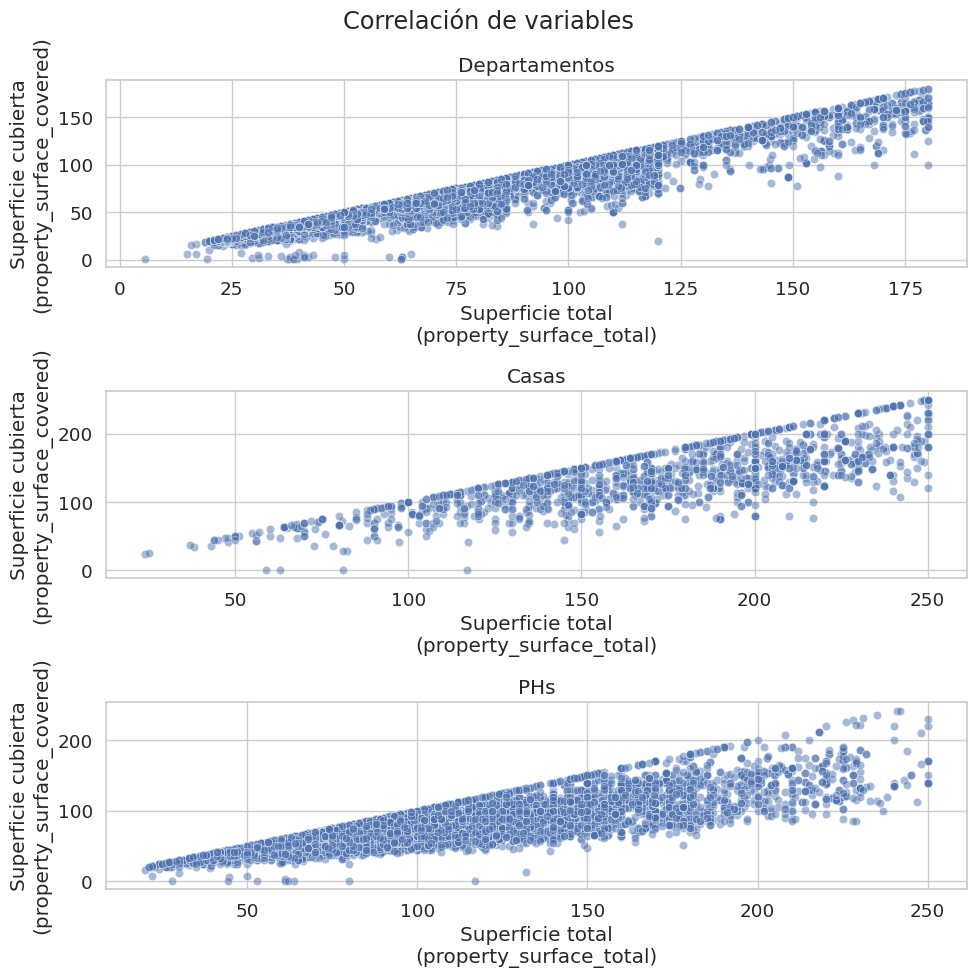

In [ ]:
grafica, ax = plt.subplots(3, 1, figsize=(10, 10))
grafica.suptitle("Correlación de variables")


for indice, tipo_de_propiedad in enumerate(["Departamento", "Casa", "PH"]):

  # Armamos un dataframe con las variables a comparar.
  df_para_correlaciones = ds_properati[["property_surface_total",
                                      "property_surface_covered"]]
  df_para_correlaciones = df_para_correlaciones.loc[ds_properati["property_type"] == tipo_de_propiedad]

  # 1- Graficamos ambientes vs habitaciones.
  sns.scatterplot(x = "property_surface_total",
                  y = "property_surface_covered",
                  data = df_para_correlaciones,
                  alpha = 0.5,
                  ax = ax[indice]
                  ).set(xlabel = "Superficie total\n(property_surface_total)",
                        ylabel = "Superficie cubierta\n(property_surface_covered)")
  ax[indice].set_title(tipo_de_propiedad + "s")

grafica.tight_layout()

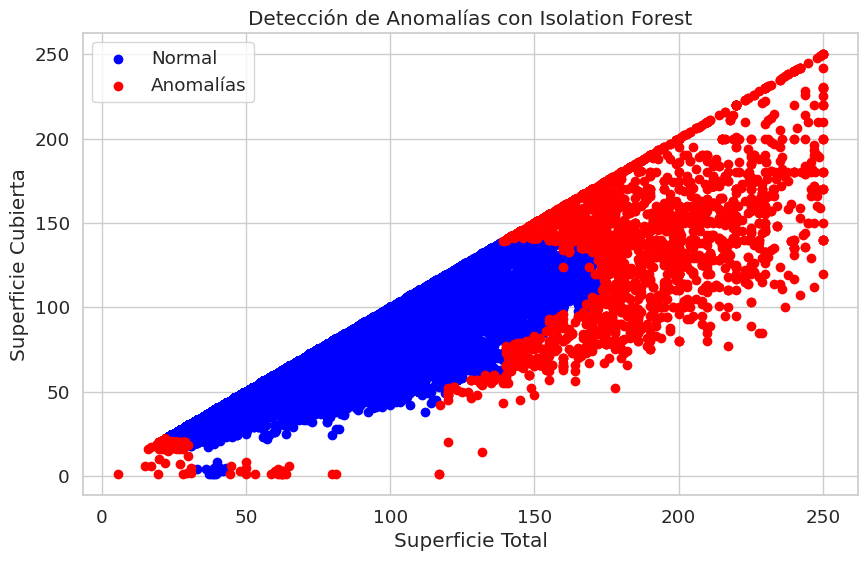


Se eliminaron 3054 propiedades consideradas anomalas


In [ ]:
# Selecciono las características relevantes
features = ds_properati[["property_surface_total", "property_surface_covered"]]

# Entrenamos el modelo Isolation Forest
isolation_forest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=features.shape[1],
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)
isolation_forest.fit(features)

# Buscamos las anomalias
anomalies = isolation_forest.predict(features)

# Agrega las predicciones al DataFrame original
ds_properati["anomaly_if"] = anomalies

# Filtra los datos para ver las anomalías detectadas
df_normales = ds_properati[ds_properati["anomaly_if"] != -1]
anomalies_df = ds_properati[ds_properati["anomaly_if"] == -1]

# Graficar un scatter plot con los valores anómalos resaltados
plt.figure(figsize=(10, 6))
plt.scatter(df_normales["property_surface_total"], df_normales["property_surface_covered"], c='blue', label='Normal')
plt.scatter(anomalies_df["property_surface_total"], anomalies_df["property_surface_covered"], c='red', label='Anomalías')
plt.xlabel("Superficie Total")
plt.ylabel("Superficie Cubierta")
plt.title("Detección de Anomalías con Isolation Forest")
plt.legend()
plt.show()

# Elimino los valores que fueron marcados como anomalos
print(f"\nSe eliminaron {anomalies_df.shape[0]} propiedades consideradas anomalas")
ds_properati.drop(anomalies_df.index, inplace=True)
ds_properati.reset_index(drop = True, inplace = True)

# Elimino la columna de las anomalias
ds_properati.drop("anomaly_if", axis=1, inplace=True)

##### 2.4.2.4. `property_surface_total` (Superficie total) vs `property_price` (Precio)

Vamos a analizar el precio de las propiedades comparandolo contra la superficie de las mismas para buscar anomalias.

Pero, hay un problema que salta a la vista en cuanto pensamos en relacionar estas dos variables ▶ El precio por metro cuadrado puede llegar a variar considerablemente en funcion del barrio en el cual nos encontremos.

Para intentar compensar esto, vamos a tener en cuenta tambien el barrio en el cual este ubicada la propiedad.

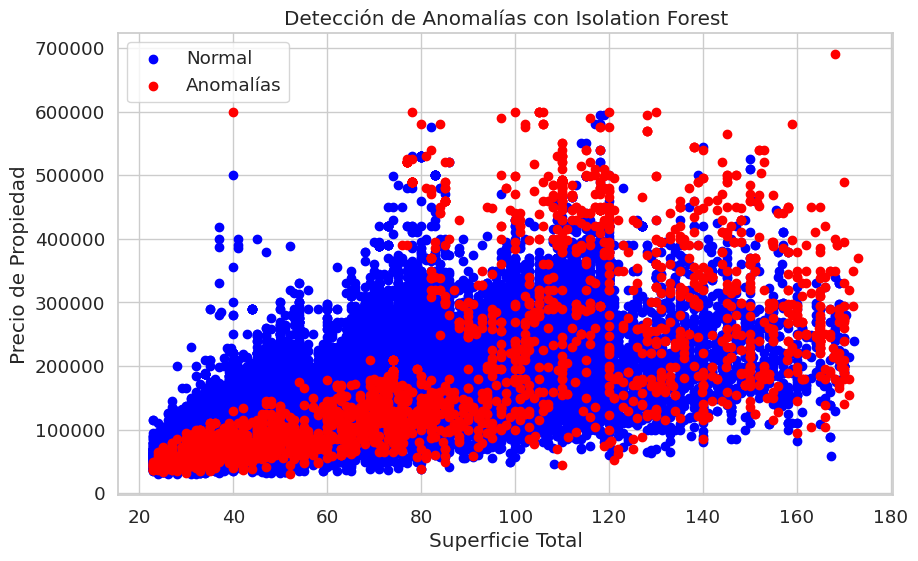


Se eliminaron 2902 propiedades consideradas anomalas


In [ ]:
# Selecciono las características relevantes
features = ds_properati[["property_surface_total", "property_price", "place_l3"]]
features = pd.get_dummies(features, columns=["place_l3"])

# Entrenamos el modelo Isolation Forest
isolation_forest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=features.shape[1],
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)
isolation_forest.fit(features)

# Buscamos las anomalias
anomalies = isolation_forest.predict(features)

# Agrega las predicciones al DataFrame original
ds_properati["anomaly_if"] = anomalies

# Filtra los datos para ver las anomalías detectadas
df_normales = ds_properati[ds_properati["anomaly_if"] != -1]
anomalies_df = ds_properati[ds_properati["anomaly_if"] == -1]

# Graficar un scatter plot con los valores anómalos resaltados
plt.figure(figsize=(10, 6))
plt.scatter(df_normales["property_surface_total"], df_normales["property_price"], c='blue', label='Normal')
plt.scatter(anomalies_df["property_surface_total"], anomalies_df["property_price"], c='red', label='Anomalías')
plt.xlabel("Superficie Total")
plt.ylabel("Precio de Propiedad")
plt.title("Detección de Anomalías con Isolation Forest")
plt.legend()
plt.show()

# Elimino los valores que fueron marcados como anomalos
print(f"\nSe eliminaron {anomalies_df.shape[0]} propiedades consideradas anomalas")
ds_properati.drop(anomalies_df.index, inplace=True)
ds_properati.reset_index(drop = True, inplace = True)

# Elimino la columna de las anomalias
ds_properati.drop("anomaly_if", axis=1, inplace=True)

##### 2.4.2.5. `property_rooms`(ambientes) vs `property_price` (precio)

Similar a lo que hicimos en la seccion anterior, ahora vamos a analizar el precio de las propiedades comparandolo contra la cantidad de ambientes para buscar anomalias.

Al igual que antes, tambien vamos a tener en cuenta el barrio en el cual se encuentra la propiedad ubicada, dado que no cuesta lo mismo un 2 ambientes en Recoleta que uno en Floresta.

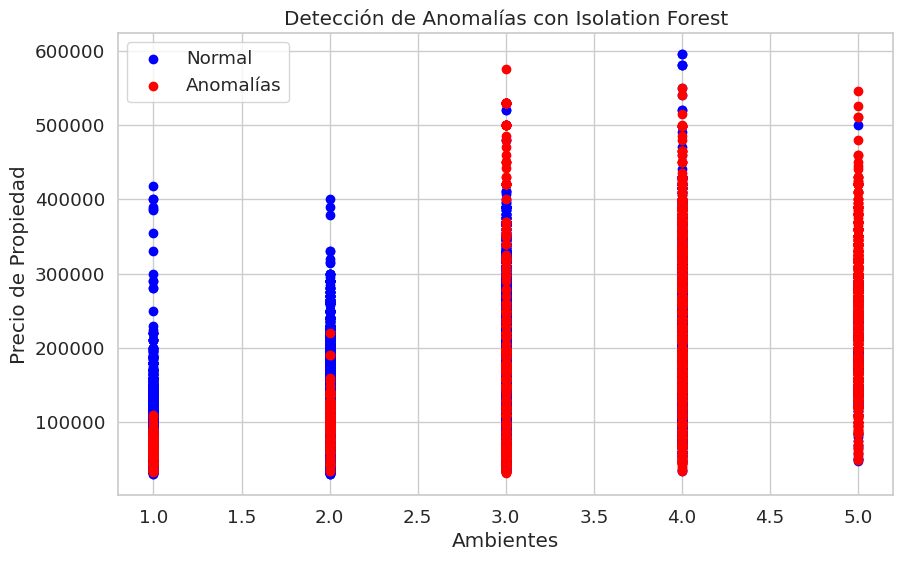


Se eliminaron 2757 propiedades consideradas anomalas


In [ ]:
# Selecciono las características relevantes
features = ds_properati[["property_rooms", "property_price", "place_l3"]]
features = pd.get_dummies(features, columns=["place_l3"])

# Entrenamos el modelo Isolation Forest
isolation_forest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=features.shape[1],
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)
isolation_forest.fit(features)

# Buscamos las anomalias
anomalies = isolation_forest.predict(features)

# Agrega las predicciones al DataFrame original
ds_properati["anomaly_if"] = anomalies

# Filtra los datos para ver las anomalías detectadas
df_normales = ds_properati[ds_properati["anomaly_if"] != -1]
anomalies_df = ds_properati[ds_properati["anomaly_if"] == -1]

# Graficar un scatter plot con los valores anómalos resaltados
plt.figure(figsize=(10, 6))
plt.scatter(df_normales["property_rooms"], df_normales["property_price"], c='blue', label='Normal')
plt.scatter(anomalies_df["property_rooms"], anomalies_df["property_price"], c='red', label='Anomalías')
plt.xlabel("Ambientes")
plt.ylabel("Precio de Propiedad")
plt.title("Detección de Anomalías con Isolation Forest")
plt.legend()
plt.show()

# Elimino los valores que fueron marcados como anomalos
print(f"\nSe eliminaron {anomalies_df.shape[0]} propiedades consideradas anomalas")
ds_properati.drop(anomalies_df.index, inplace=True)
ds_properati.reset_index(drop = True, inplace = True)

# Elimino la columna de las anomalias
ds_properati.drop("anomaly_if", axis=1, inplace=True)

##### 2.4.2.6 - Graficamos y almacenamos nuestro dataset filtrado

In [ ]:
df_copia = ds_properati.copy()

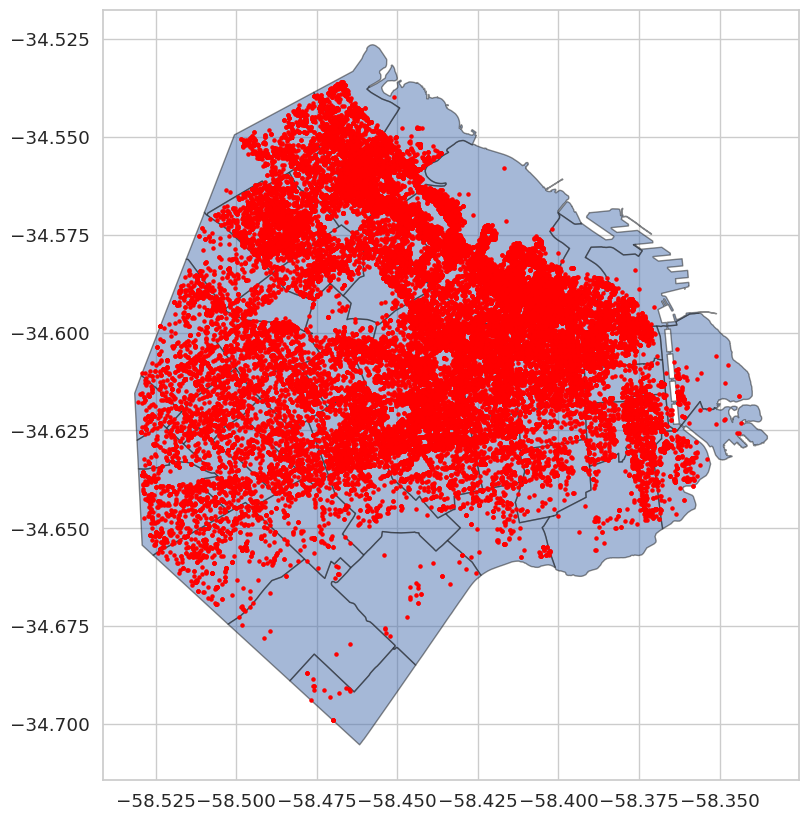

In [ ]:
# Cargar el archivo GeoJSON de los barrios de CABA
barrios_caba = gpd.read_file(ruta + "barrios_caba.geojson")

# Convertir latitud y longitud en puntos geométricos
geometry = [Point(xy) for xy in zip(ds_properati["longitud"], ds_properati["latitud"])]
crs = {"init": "epsg:4326"}  # Sistema de coordenadas WGS84

# Crear un GeoDataFrame a partir del DataFrame limpio y los puntos geométricos
gdf_properati = gpd.GeoDataFrame(
    ds_properati,
    crs=crs,
    geometry=geometry
    )

# Realizar una operación de espacio para encontrar los puntos dentro de los límites de CABA
gdf_properati_caba = gpd.sjoin(
    gdf_properati,
    barrios_caba,
    how="inner",
    op="within"
    )

# Paso 2: Plotear el resultado sobre un mapa
import matplotlib.pyplot as plt

# Plotear los barrios de CABA
barrios_caba.plot(
    alpha=0.5,
    edgecolor="k",
    figsize=(10, 10)
    )

# Plotear los puntos filtrados
gdf_properati_caba.plot(
    ax=plt.gca(),
    marker="o",
    color="red",
    markersize=5
    )

# Muestro toda la grafica.
plt.show()

In [ ]:
# Exportamos nuestro dataset filtrado
ds_properati.to_csv("ds_filtrado.csv", index=False)

## 3. Agrupamiento

<font color="yellow">a completar</font>